Autor projektu: Felicjan Jaguś 
Kurs: Data science in Python

Zadanie 1 

Uzasadnienie wyboru zadania 1: 
Do zaliczenia kursu wybieram zadanie pierwsze poniewaz interesuja mnie przede wszystkim zastosowania ekonomiczne Data Science. Analiza regresji w ekonomii nie tylko pozwala budowac skuteczne modele ale przede wszystkim opisywac zjawiska ekonomiczne. Pawel Konior na zajeciach podkreslil, ze zadanie pierwsze wymaga znajomosci rynku nieruchomosci w USA. Ja uwazam, ze po to zglebiamy Data science, zeby moc byc rownie skutecznym co eksperci bez wiedzy eksperckiej.

Uwagi autora pracy: w mojej pracy wszystkie komentarze sa napisane bez uwzglednienia polskiej czcionki. przepraszam za ta niedogodnosc.

Zadanie: Przewidywanie ceny domów. Celem projektu jest zastosowanie modeli regresji do przewidzenia ceny domu o podanych cechach.

Wymagania:
1) Musi zostać wykorzystany model regresji liniowej.
2) Muszą zostać wykorzystane przynajmniej dwie inne metody regresji: regresja Ridge, regresja Lasso, drzewo regresyjne, las losowy regresyjny, XGBoost lub inne).
3) Trzeba uwzględnić optymalizację modeli/pipelinów.
4) Nie usuwamy żadnych obserwacji - braki danych uzupełniamy w jakiś sposób.
5) Wszelkie nieoczywiste przekształcenia danych należy opatrzyć uzasadnieniem dlaczego dokonujemy tego przekształcenia (np. robimy wykres i uzasadniamy wzięci logarytmu ze zmiennej tym, że rozkład jest skośny).
6) Musi pojawić się ocena graficzna predykcji modeli (np. wykresy wartości przewidywanych od prawdziwych czy wykresy reziduów).
7) Projekt musi być zakończony przejrzystym porównaniem przetestowanych rozwiązań (modeli/pipelinów) w postaci tabeli, gdzie jeden wiersz opisuje jedno rozwiązanie i jego wynik.
    

Etap I podsumowanie:
    1) wiele zmiennych o wartosciach null (NaN) niesie w sobie specyficzna informacje (brak garazu, brak piwnicy itp), ktore nalezy uwzglednic jako odrebne zmienne. 
    2) Wydzielenie takich zmiennych spowoduje, ze beda sie powtarzac - wiec bedzie trzeba zadbac by pojawialy sie tylko raz.
    3) Niektore zmienne porzadkow mozna zakodowac jak rankingowe - nadac im ranking - do zastanowienia sie czy tak zrobic czy tez tylko skorzystac z get_dummies.
    4) czesc zmiennych z wartosciami NaN  - powinna byc imputowana wartoscia dominanty - nalezy na to zwrocic uwage.

Etap II - Przygotowanie danych - czyszczenie i modyfikacja.

In [154]:
# import bibliotek i modułów analitycznych

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns
import sklearn
import random
import sys
import datetime
from pandas import DataFrame, Series

import pickle

from sklearn import model_selection
from sklearn import  metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import RandomizedLasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA

import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.metrics import accuracy_score



In [2]:
#przygotowuje możliwość korzystania z języka SQL

import os, os.path, tempfile, csv, sqlite3

baza = os.path.join(tempfile.mkdtemp(), "bazadanych.db")
if os.path.isfile(baza):
    os.remove(baza)

conn = sqlite3.connect(baza)
    


In [3]:
#Pobranie danych - dane pierwotne mam juz w postaci tabeli xlsx

path = '/home/kodolamacz/data_science_sages/Felicjan_Jagus_zaliczenie/AmesHousing.xlsx'

df01 = pd.ExcelFile(path)

df02 = pd.read_excel(df01, 'Arkusz1')

df02.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
#sprawdzam mozliwosc wykorzystania sql query
df02.to_sql("df02", conn)
pd.read_sql_query(""" 
select * from df02
""", conn).head(3)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


,index,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,None,IR1,...,0,None,None,None,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,None,Reg,...,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,None,IR1,...,0,None,None,Gar2,12500,6,2010,WD,Normal,172000


In [5]:
#sprawdzam czy pobrany zbiór posiada podaną ilość wierszy i kolumn
print(df02.shape)


(2930, 82)


In [6]:
#sprawdzam czy w zbiorze danych nie ma duplikatów
pd.read_sql_query(""" 
select distinct * from df02
""", conn).tail(3)["Order"]

2927    2928
2928    2929
2929    2930
Name: Order, dtype: int64

In [7]:
# dla lepszej czytelnosci zbioru danych oraz na potrzeby przetwarzania w sql\n 
# pozbywam sie spacji w nazwach kolumn

columns =[]
for column in df02.columns:
    columns.append(column)

new_columns=[]
for column in columns:
    column_new = column.translate(str.maketrans(" ", "_"))
    new_columns.append(column_new)


for z in zip(columns, new_columns):
    column, column_new = z
    df02.rename(columns={column: column_new}, inplace=True)
    
print(df02.columns)

    

Index(['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
      

In [8]:
df02.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [9]:
#sprawdzam typy danych i wartosci null
def check_nulls(df, dtype):
    s = df.select_dtypes(include=[dtype]).isnull().any()
    s = s[s==True]
    info = print(f"{len(s)} {dtype} variables have null values\n")
    return info

check_nulls(df02, 'object')
check_nulls(df02, 'int64')
check_nulls(df02, 'float')

16 object variables have null values

0 int64 variables have null values

11 float variables have null values



In [10]:
#grupuje zmienne na zmienne z wartosciami null oraz bez wartosci null

columns_with_miss = []
for column in df02.columns:
    if df02.groupby([column]).size().sum() < len(df02):
        columns_with_miss.append(column)
        
print(f"columns_with_miss:  {columns_with_miss}\n")
print("*******************\n")
  
columns_without_miss = []
for column in df02.columns:
    if df02.groupby([column]).size().sum() == len(df02):
        columns_without_miss.append(column)
        
print(f"columns_without_miss: {columns_without_miss}\n")        
print("*******************\n")
print(len(columns_with_miss))
print(len(columns_without_miss))
print(len(columns_with_miss + columns_without_miss))

columns_with_miss:  ['Lot_Frontage', 'Alley', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Electrical', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt', 'Garage_Finish', 'Garage_Cars', 'Garage_Area', 'Garage_Qual', 'Garage_Cond', 'Pool_QC', 'Fence', 'Misc_Feature']

*******************

columns_without_miss: ['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Area', 'Street', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Heating', 'Heating_QC', 'Central_Air', '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Ki

In [11]:
#sprawdzenie czy zmienna "PID" jest zmienna o unikalnych wartosciach

pd.read_sql_query(""" 
select PID, count(*) as count_PID from df02 group by PID having count(*)>1
""", conn)

,PID,count_PID


In [12]:
# tera etap czyszczenia brakow danych
# w pierwszej kolejnosci biore pod uwage ciagle zmienne z brakami danych  
# w tym celu identyfikuje je poprzez polecenie describe

df02[columns_with_miss].describe()

,Lot_Frontage,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Garage_Yr_Blt,Garage_Cars,Garage_Area
count,2440.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2928.000000,2928.000000,2771.000000,2929.000000,2929.000000
mean,69.224590,101.896801,442.629566,49.722431,559.262547,1051.614544,0.431352,0.061134,1978.132443,1.766815,472.819734
std,23.365335,179.112611,455.590839,169.168476,439.494153,440.615067,0.524820,0.245254,25.528411,0.760566,215.046549
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,219.000000,793.000000,0.000000,0.000000,1960.000000,1.000000,320.000000
50%,68.000000,0.000000,370.000000,0.000000,466.000000,990.000000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [13]:
dfcol_with_miss_c = df02[columns_with_miss].describe()
print(dfcol_with_miss_c.columns)
print(len(dfcol_with_miss_c.columns))

Index(['Lot_Frontage', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath',
       'Garage_Yr_Blt', 'Garage_Cars', 'Garage_Area'],
      dtype='object')
11


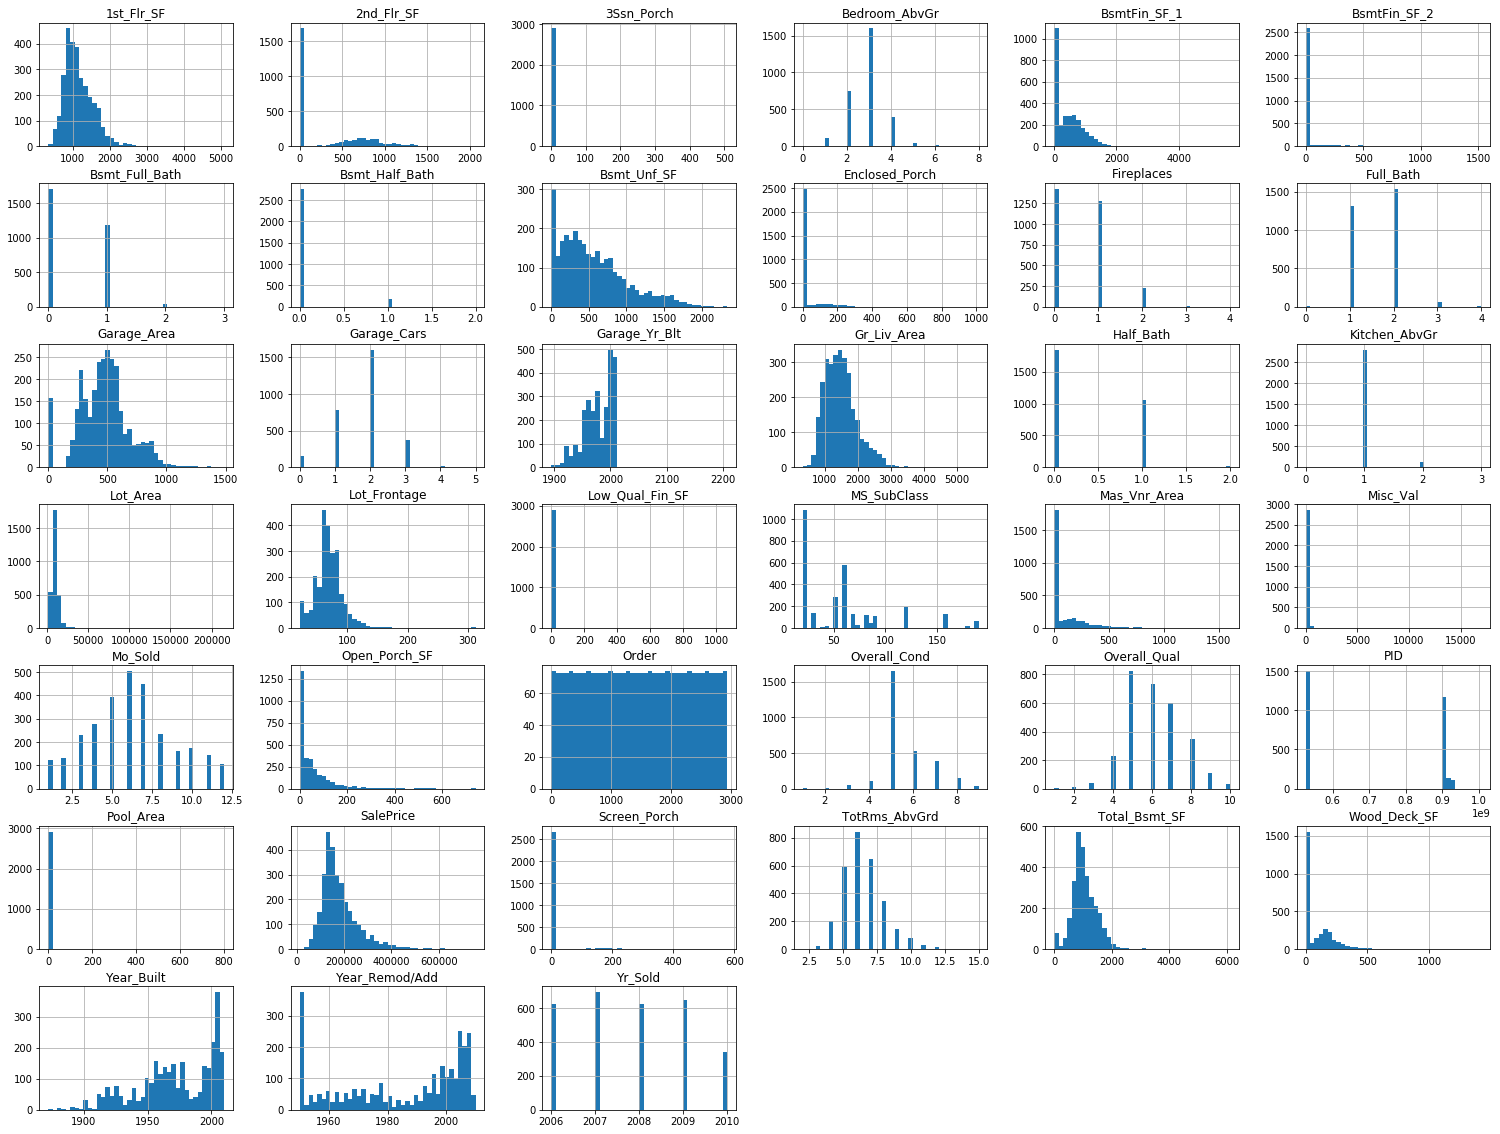

In [14]:
# Spojrzenie na wszystkie zmienne numeryczne na wykresach ich rozkladow dla ogolnej \n
# oceny danych
%matplotlib inline 

import matplotlib.pyplot as plt
df02.hist(bins=40, figsize=(26,20))
plt.show()

pierwsze wnioski: 
1) wstepnie widac, ze do uzupelniania brakow danych bede wykorzystywal albo srednia albo mediane albo dominante
2) najprawdopodobniej asymetrie niektorych rozkladow przypominajacych rozklad normalny bedzie sie dalo poprawic przez transformacje logarytmiczna


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


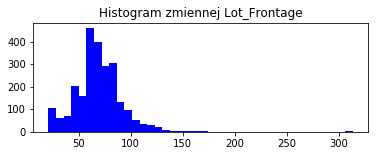

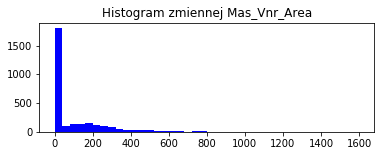

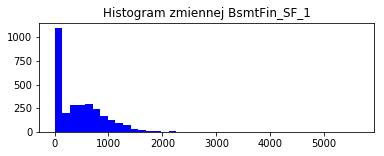

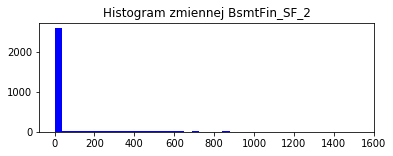

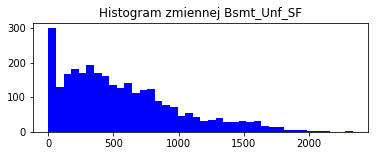

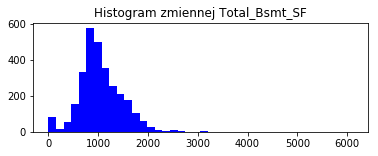

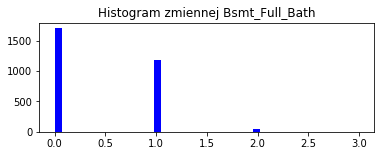

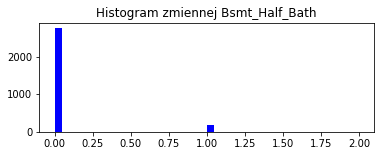

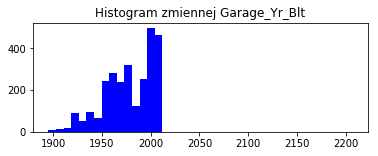

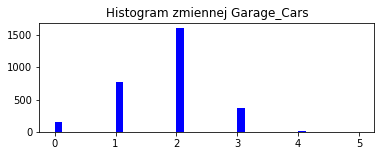

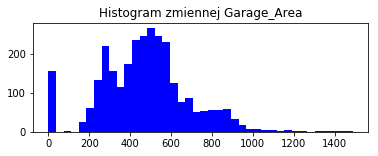

In [15]:
# Spojrzmy wiec na histogramy zmiennych z brakami danych.
# Histogramy zmiennych ciaglych z wartosciami NaN
%matplotlib inline 
for col in dfcol_with_miss_c.columns:
    %matplotlib inline 
    fig, axes = plt.subplots(1,1, figsize=(6,2))
    plt.hist(df02[col], color='b', bins=40)
    plt.title('Histogram zmiennej %s' % (col))
    plt.show()

Wnioski:
powyzsze wykresy wskazuja, ze rozklady zmiennych dotyczacych piwnicy (Bsmt) oraz garazu (Garage) zaleza od tego czy nieruchomosc posiada piwnice lub garaz dlatego: 
1) stworze nowe zmienne flagowe: flaga czy garaz oraz flaga czy piwnica
2) nastepnie sprawdze ich rozklady warunowe
3) braki danych uzupelnie biorac pod uwage rozklad warunkowy

In [16]:
# tworze zmienna Garage_flag
df02['Garage_flag'] = df02['Garage_Type'].map(lambda s: 0 if pd.isnull(s) else 1)
print(df02.shape)
df02.loc[:,['Garage_Type', 'Garage_flag']].drop_duplicates()

(2930, 83)


,Garage_Type,Garage_flag
0,Attchd,1
15,BuiltIn,1
16,Basment,1
18,Detchd,1
27,NaN,0
205,CarPort,1
246,2Types,1


In [17]:
# tworze zmienna Bsmt_flag
df02['Bsmt_flag'] = df02['Bsmt_Cond'].map(lambda s: 0 if pd.isnull(s) else 1)
print(df02.shape)
df02.loc[:,['Bsmt_Cond', 'Bsmt_flag']].drop_duplicates()

(2930, 84)


,Bsmt_Cond,Bsmt_flag
0,Gd,1
1,TA,1
83,NaN,0
104,Po,1
170,Fa,1
1183,Ex,1


In [18]:
# teraz sprawdzam rozklady wczesniejszych zmiennych ciaglych z NaNa \n
# w podziale na garage flag oraz basmt flag

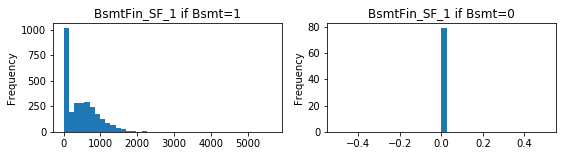

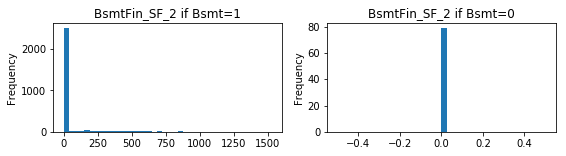

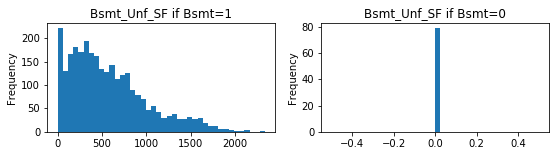

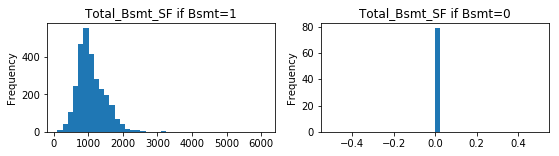

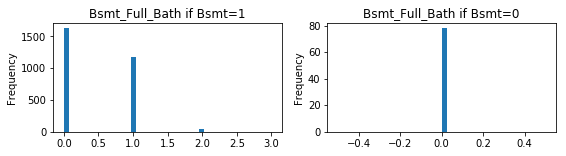

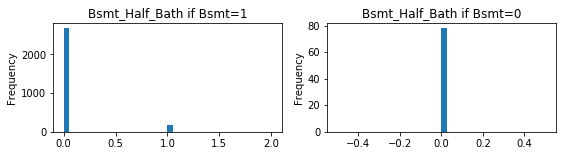

In [20]:

# Histogramy zmiennych ciaglych z wartosciami NaN zalezne od Basmt

for col in ['BsmtFin_SF_1', 'BsmtFin_SF_2',
           'Bsmt_Unf_SF',   'Total_Bsmt_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    df02[df02["Bsmt_flag"]==1][col].plot(kind='hist', bins=40, figsize=(9,2), ax=axes[0]); axes[0].set_title('%s if Bsmt=1' %(col))
    df02[df02["Bsmt_flag"]==0][col].plot(kind='hist', bins=40, figsize=(9,2), ax=axes[1]); axes[1].set_title('%s if Bsmt=0' %(col))

plt.show()

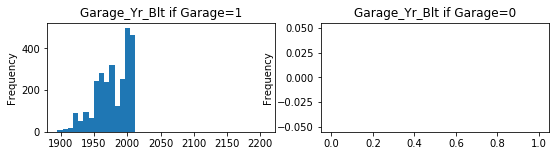

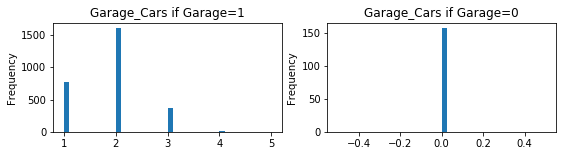

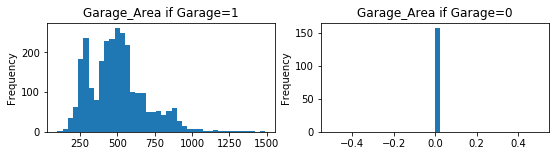

In [21]:
# Histogramy zmiennych ciaglych z wartosciami NaN zalezne od Garage
for col in ['Garage_Yr_Blt', 'Garage_Cars', 'Garage_Area']:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    df02[df02["Garage_flag"]==1][col].plot(kind='hist', bins=40, figsize=(9,2), ax=axes[0]); axes[0].set_title('%s if Garage=1' %(col))
    df02[df02["Garage_flag"]==0][col].plot(kind='hist', bins=40, figsize=(9,2), ax=axes[1]); axes[1].set_title('%s if Garage=0' %(col))
#     plt.hist(df02[col], color='b', bins=40)
#     plt.title('Histogram zmiennej %s' % (col))
    plt.show()

In [22]:
# uzupelniam wlasciwe zmienne mediana
# ze wzgledu na to, ze jest to istotna zmodyfikacja pierwotnego zbioru danych\n
# to zbior danych kopiuje i zmieniam jego nazwe - zbior z brakami danych bedzie mogl byc \n
# wykorzystany pozniej podczas stosowania estymacji nieparametrycznych (drzewa/ lasy regresyjne) 
import copy 

df03 = copy.deepcopy(df02) #kopia gleboka

to_fill_by_median = ["Lot_Frontage", "Mas_Vnr_Area","Garage_Area", "BsmtFin_SF_1", "BsmtFin_SF_2","Bsmt_Unf_SF"]
for col in to_fill_by_median:
    median = df02[col].median()
    df03[col+"_med"]=median
    df03[col].fillna(median, inplace=True)    



In [23]:
print(df02.shape)
print(df03.shape)
df02.head()   

(2930, 84)
(2930, 90)


,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,Garage_flag,Bsmt_flag
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,1,1
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,1,1
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,1,1
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,1,1
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,1,1


In [24]:
# pozostale zmienne do uzupelnienia brakow danych dominanta 

df04 = copy.deepcopy(df03) 

df04["Garage_Cars"].fillna(2, inplace=True)
df04["Bsmt_Full_Bath"].fillna(0, inplace=True)
df04["Bsmt_Half_Bath"].fillna(0, inplace=True)

print(df02.shape)
print(df03.shape)
print(df04.shape)

(2930, 84)
(2930, 90)
(2930, 90)


In [25]:
# na tym etapie przy okazji obslugi zmiennej Garage_Yr_Blt\n
# stworze nowe zmienne, ktore beda wskazywac wiek zamiast daty\n
# a nastepnie juz w nowych zmiennych uzupelnie braki danych

df05 = copy.deepcopy(df04)

df05['Years_from_built'] = df04['Yr_Sold'].values - df04['Year_Built'].values 
df05['Year_from_Remod'] = df04['Yr_Sold'].values - df04['Year_Remod/Add'].values
df05['Year_from_Garage_Blt'] = df04['Yr_Sold'].values - df04['Garage_Yr_Blt'].values

print(df04.shape)
print(df05.shape)
df05.head(4)



(2930, 90)
(2930, 93)


,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Bsmt_flag,Lot_Frontage_med,Mas_Vnr_Area_med,Garage_Area_med,BsmtFin_SF_1_med,BsmtFin_SF_2_med,Bsmt_Unf_SF_med,Years_from_built,Year_from_Remod,Year_from_Garage_Blt
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,1,68.0,0.0,480.0,370.0,0.0,466.0,50,50,50.0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,1,68.0,0.0,480.0,370.0,0.0,466.0,49,49,49.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,1,68.0,0.0,480.0,370.0,0.0,466.0,52,52,52.0
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,1,68.0,0.0,480.0,370.0,0.0,466.0,42,42,42.0


In [26]:
# sprawdzam efekt uzupelnienia brakow danych
print(df05.loc[:,["Lot_Frontage", "Mas_Vnr_Area","Garage_Area", "BsmtFin_SF_1", "BsmtFin_SF_2","Bsmt_Unf_SF", "Garage_Cars","Bsmt_Full_Bath","Bsmt_Half_Bath"]].isnull().sum())
print("Informacja: jesli widzisz kolumne z samymi zerami to znaczy, ze braki danych w wybranych zmiennych zostaly zaimputowane")

Lot_Frontage      0
Mas_Vnr_Area      0
Garage_Area       0
BsmtFin_SF_1      0
BsmtFin_SF_2      0
Bsmt_Unf_SF       0
Garage_Cars       0
Bsmt_Full_Bath    0
Bsmt_Half_Bath    0
dtype: int64
Informacja: jesli widzisz kolumne z samymi zerami to znaczy, ze braki danych w wybranych zmiennych zostaly zaimputowane


In [27]:
# sprawdzenie brakow danych w nowych zmiennych
df05.loc[:,['Years_from_built','Year_from_Remod','Year_from_Garage_Blt']].isnull().sum()

Years_from_built          0
Year_from_Remod           0
Year_from_Garage_Blt    159
dtype: int64

In [28]:
df05.head(3)

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Bsmt_flag,Lot_Frontage_med,Mas_Vnr_Area_med,Garage_Area_med,BsmtFin_SF_1_med,BsmtFin_SF_2_med,Bsmt_Unf_SF_med,Years_from_built,Year_from_Remod,Year_from_Garage_Blt
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,1,68.0,0.0,480.0,370.0,0.0,466.0,50,50,50.0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,1,68.0,0.0,480.0,370.0,0.0,466.0,49,49,49.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,1,68.0,0.0,480.0,370.0,0.0,466.0,52,52,52.0


In [29]:
# z zasady nie powinno byc wartosci ujemnych - sprawdzam wiec czy sa.
# jest sa to zamieniam je na bardziej prawdopodobne wartosci.
df05.groupby(['Garage_flag', 'Year_from_Garage_Blt'])['Year_from_Garage_Blt'].min().head()

Garage_flag  Year_from_Garage_Blt
1            -200.0                 -200.0
             -1.0                     -1.0
              0.0                      0.0
              1.0                      1.0
              2.0                      2.0
Name: Year_from_Garage_Blt, dtype: float64

In [30]:
# sprawdzam ilosc tych ujemnych wartosci - ilosc tu moze miec znaczenie!
print(df05.groupby(['Garage_flag', 'Year_from_Garage_Blt'])['Year_from_Garage_Blt'].size().head())
print(df05.groupby(['Garage_flag', 'Year_from_Garage_Blt'])['Year_from_Garage_Blt'].size().tail())

Garage_flag  Year_from_Garage_Blt
1            -200.0                    1
             -1.0                      1
              0.0                    150
              1.0                    192
              2.0                     82
Name: Year_from_Garage_Blt, dtype: int64
Garage_flag  Year_from_Garage_Blt
1            108.0                   1
             109.0                   1
             110.0                   1
             113.0                   1
             114.0                   1
Name: Year_from_Garage_Blt, dtype: int64


In [31]:
# wniosek : zmienna Year_from_Garage_Blt zawiera braki danych (NaN) ale w tym przypadku\n
# oznaczaja one tylko to, ze nie ma garazu\n
# pojawia sie problem jak uzupelnic takie braki danych - poniewaz imputacja wartosciami \n
# >0 bedzie zawsze bledna informacja\n
# wiec w tej sytuacji uzupelnie braki danych wartoscia -1 \n
# dodatkowo wartosc -200, ktora sie pojawia i wyglada jak blad - zamieniam rowniez na -1 

df06 = copy.deepcopy(df05)

df06["Year_from_Garage_Blt"].fillna(-1, inplace=True)

df06["Year_from_Garage_Blt"].replace(to_replace={-200: -1}, inplace=True)


In [32]:
# sprawdzam efekt zamiany wybranych wartosci zmiennych.
print(df06.groupby(['Garage_flag', 'Year_from_Garage_Blt'])['Year_from_Garage_Blt'].size().head())
print(df06.loc[:,['Year_from_Garage_Blt']].isnull().sum())

Garage_flag  Year_from_Garage_Blt
0            -1.0                    157
1            -1.0                      4
              0.0                    150
              1.0                    192
              2.0                     82
Name: Year_from_Garage_Blt, dtype: int64
Year_from_Garage_Blt    0
dtype: int64


In [33]:
# usuwam niepotrzebne zmienne:

df07 = copy.deepcopy(df06)

vars_to_drop=['Garage_Yr_Blt', 'Year_Built', 'Year_Remod/Add','Lot_Frontage_med','Mas_Vnr_Area_med', 'Garage_Area_med', 'BsmtFin_SF_1_med','BsmtFin_SF_2_med', 'Bsmt_Unf_SF_med']

df07.drop(columns=vars_to_drop, inplace=True)

print(df06.shape)
print(df07.shape)
df03.head(3)


(2930, 93)
(2930, 84)


,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Sale_Condition,SalePrice,Garage_flag,Bsmt_flag,Lot_Frontage_med,Mas_Vnr_Area_med,Garage_Area_med,BsmtFin_SF_1_med,BsmtFin_SF_2_med,Bsmt_Unf_SF_med
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,Normal,215000,1,1,68.0,0.0,480.0,370.0,0.0,466.0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,Normal,105000,1,1,68.0,0.0,480.0,370.0,0.0,466.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,Normal,172000,1,1,68.0,0.0,480.0,370.0,0.0,466.0


In [34]:
# po uzupelnieniu brakow danych jeszcze raz generuje rozklady zmiennych ciaglych \n
# byc moze rozklady pewnych zmiennych bedzie dalo sie poprawic \n
# ze wzgledu na odstepstwo od rozkladu normalnego
# jednak w tym momencie mozemy od razu przeanalizowac wszystkie rozklady zmiennych ciaglych\n
# a nie tylko te z brakami danych - poniewaz braki danych zostaly juz uzupelnione.

# wybieramy wiec wszystkie zmienne o charakterze ciaglym

print(df07.describe().columns)
df07.describe()



Index(['Order', 'PID', 'MS_SubClass', 'Lot_Frontage', 'Lot_Area',
       'Overall_Qual', 'Overall_Cond', 'Mas_Vnr_Area', 'BsmtFin_SF_1',
       'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars',
       'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch',
       '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold',
       'Yr_Sold', 'SalePrice', 'Garage_flag', 'Bsmt_flag', 'Years_from_built',
       'Year_from_Remod', 'Year_from_Garage_Blt'],
      dtype='object')


,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,...,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,Garage_flag,Bsmt_flag,Years_from_built,Year_from_Remod,Year_from_Garage_Blt
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.019795,10147.921843,6.094881,5.563140,101.096928,442.604778,49.705461,...,2.243345,50.635154,6.216041,2007.790444,180796.060068,0.946416,0.972696,36.434130,23.523891,28.059044
std,845.96247,1.887308e+08,42.638025,21.326422,7880.017759,1.411026,1.111537,178.634545,455.515036,169.142089,...,35.597181,566.344288,2.714492,1.316613,79886.692357,0.225233,0.162995,30.291357,20.858846,25.476763
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000,0.000000,-1.000000,-2.000000,-1.000000
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,2007.000000,129500.000000,1.000000,1.000000,7.000000,4.000000,5.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,0.000000,370.000000,0.000000,...,0.000000,0.000000,6.000000,2008.000000,160000.000000,1.000000,1.000000,34.000000,15.000000,25.000000
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,162.750000,734.000000,0.000000,...,0.000000,0.000000,8.000000,2009.000000,213500.000000,1.000000,1.000000,54.000000,42.750000,46.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1526.000000,...,800.000000,17000.000000,12.000000,2010.000000,755000.000000,1.000000,1.000000,136.000000,60.000000,114.000000


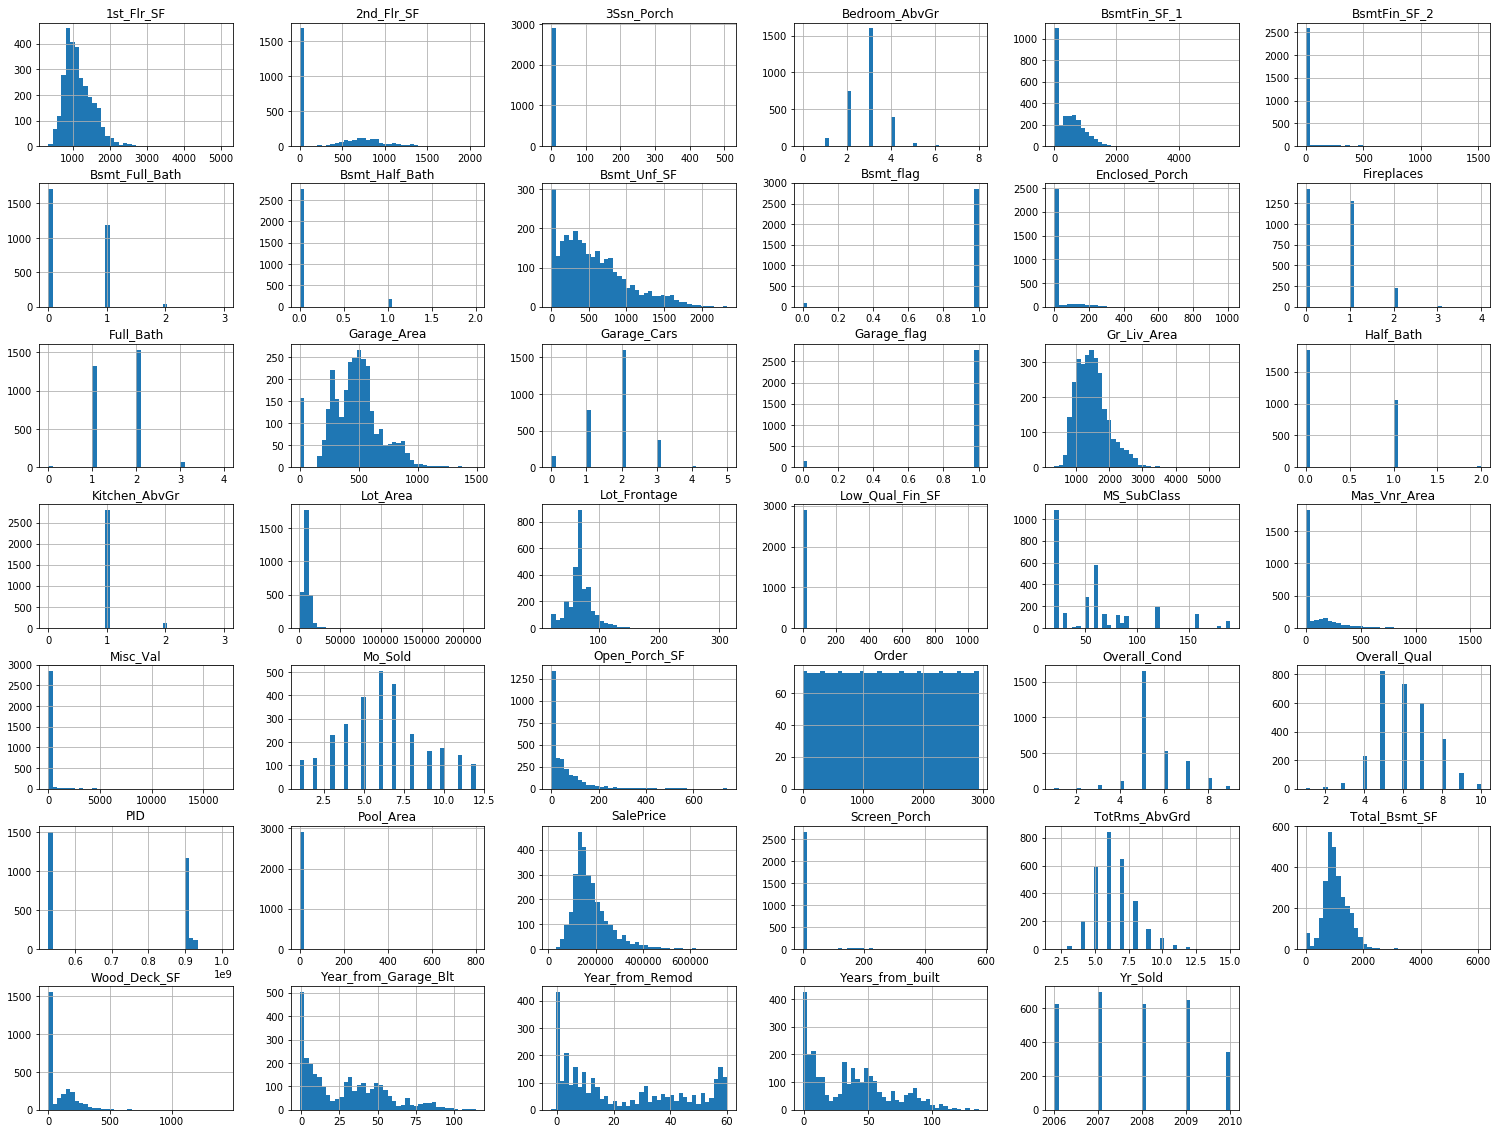

In [35]:
# jeszcze raz spojrzenie na rozklady zmiennych numerycznych przed dalsza analiza.
%matplotlib inline 

# import matplotlib.pyplot as plt
df07.hist(bins=40, figsize=(26,20))
plt.show()

In [36]:
# teraz analiza korelacji w celu potencjalnego usuniecia zbyt skorelowanych zmienncy\n
# jest to potrzebne by estymatory regresji liniowej byly dobrej jakosci.
# Nie bedzie to mialo znaczenia w przypadku nieparametrycznych metod bazujacych \n
# na drzewach regresyjnych - ale w tym momencie zakladam, ze przygotowuje dane pod 
# model klasycznej regresji liniowej.

vars_for_corr = ['MS_SubClass', 'Lot_Frontage', 'Lot_Area',
       'Overall_Qual', 'Overall_Cond', 'Mas_Vnr_Area', 'BsmtFin_SF_1',
       'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars',
       'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch',
       '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold',
       'Yr_Sold', 'Garage_flag', 'Bsmt_flag', 'Years_from_built',
       'Year_from_Remod', 'Year_from_Garage_Blt']

korelacje = df07[vars_for_corr].corr("pearson")

korelacje = korelacje.where(np.triu(np.ones(korelacje.shape, dtype=np.bool), k=1)).stack().sort_values()
korelacje[abs(korelacje)>0.6] 

values = pd.DataFrame(korelacje[abs(korelacje)>0.6])
values


,,0
2nd_Flr_SF,Half_Bath,0.611634
Years_from_built,Year_from_Remod,0.613364
Gr_Liv_Area,Full_Bath,0.630321
BsmtFin_SF_1,Bsmt_Full_Bath,0.640084
2nd_Flr_SF,Gr_Liv_Area,0.655251
Bedroom_AbvGr,TotRms_AbvGrd,0.672647
Years_from_built,Year_from_Garage_Blt,0.708886
Total_Bsmt_SF,1st_Flr_SF,0.800720
Gr_Liv_Area,TotRms_AbvGrd,0.807772
Garage_Cars,Garage_Area,0.889665


In [37]:
# Wnioski: w zbiorze danych wystepuje kilka zmiennych objasniajacych \n
# silnie skorelowanych liniowo. Sa to nastepujace zmienne:
# Garage_Cars & Garage_Area
# Gr_Liv_Area & TotRms_AbvGrd
# Total_Bsmt_SF & 1st_Flr_SF
# Years_from_built & Year_from_Garage_Blt

# decyzja: zmienne: Year_from_Garage_Blt, Total_Bsmt_SF, TotRms_AbvGrd, Garage_Cars usuwam z analizy

In [38]:
# usuwam zmienne o silnej korelacji
df08 = copy.deepcopy(df07)

vars_to_drop=['Year_from_Garage_Blt', 'Total_Bsmt_SF', 'TotRms_AbvGrd', 'Garage_Cars']

df08.drop(columns=vars_to_drop, inplace=True)

print(df07.shape)
print(df08.shape)


(2930, 84)
(2930, 80)


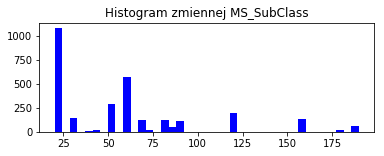

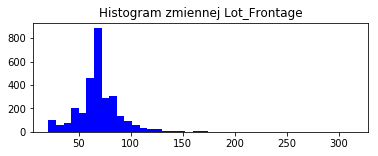

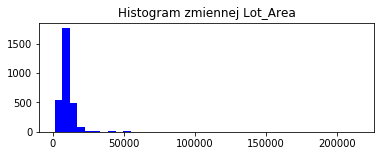

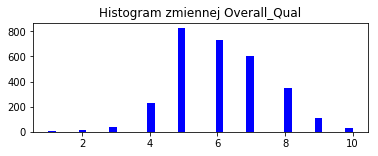

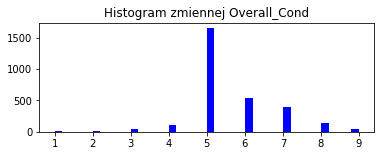

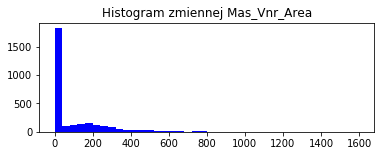

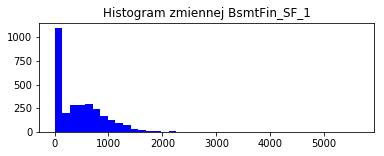

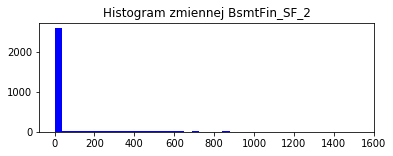

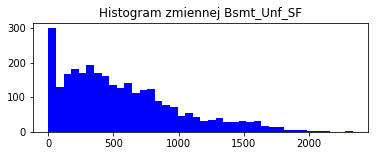

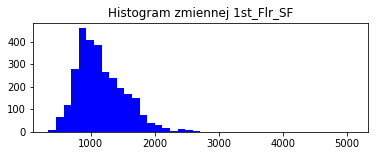

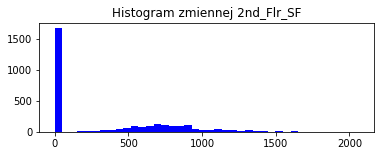

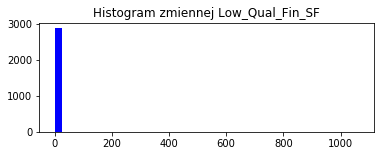

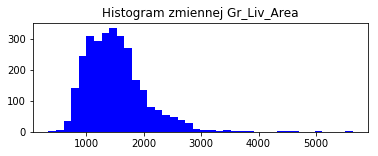

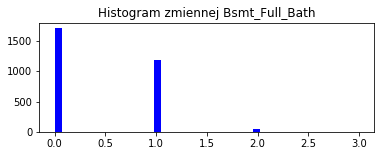

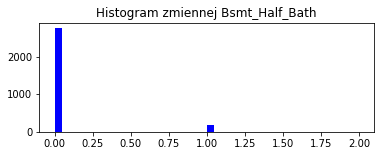

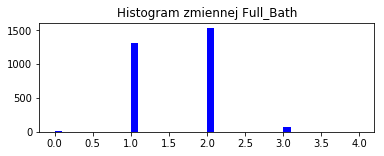

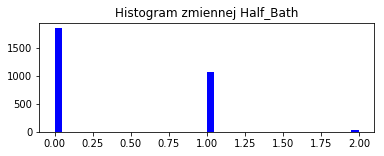

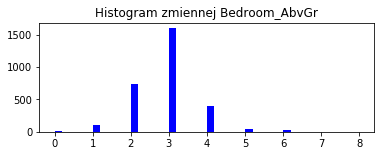

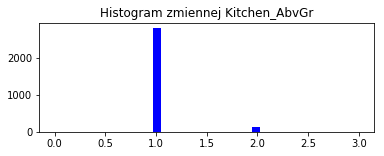

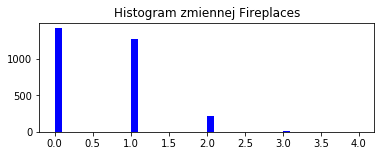

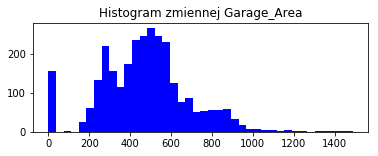

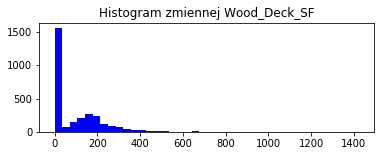

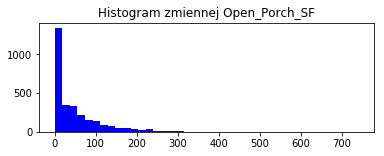

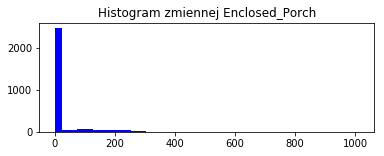

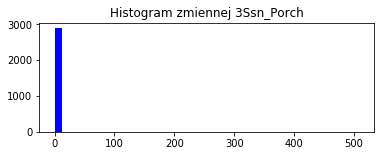

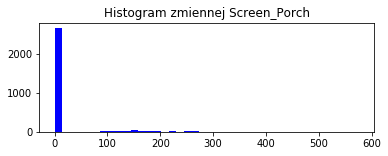

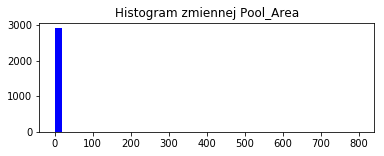

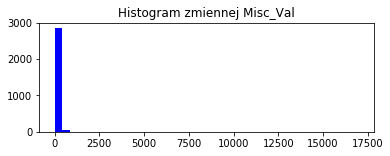

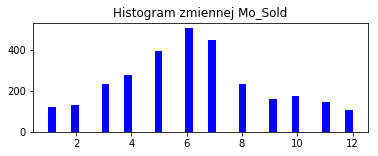

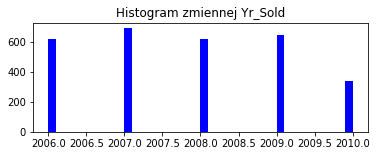

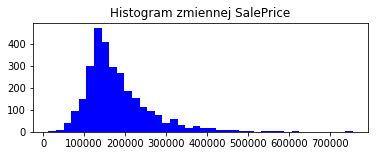

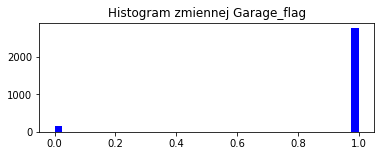

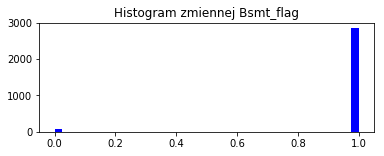

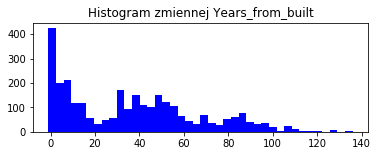

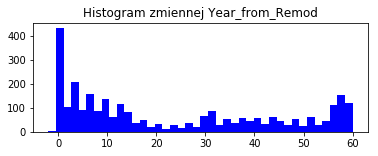

In [39]:
# sprawdzam histogramy zmiennych juz bez brakow danych - w celu podjecia decyzji o \n
# ewentualnej modyfikacji rozkladu

vars_for_analysis = ['MS_SubClass', 'Lot_Frontage', 'Lot_Area',
       'Overall_Qual', 'Overall_Cond', 'Mas_Vnr_Area', 'BsmtFin_SF_1',
       'BsmtFin_SF_2', 'Bsmt_Unf_SF', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Fireplaces','Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 
       'Enclosed_Porch','3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold',
       'Yr_Sold', 'SalePrice', 'Garage_flag', 'Bsmt_flag', 'Years_from_built',
       'Year_from_Remod']

for var in vars_for_analysis:
    fig, axes = plt.subplots(1,1, figsize=(6,2))
    plt.hist(df08[var], color='b', bins=40)
    plt.title('Histogram zmiennej %s' % (var))
    plt.show()

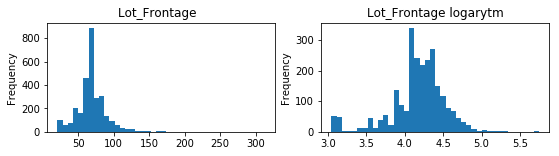

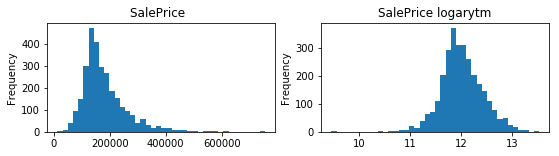

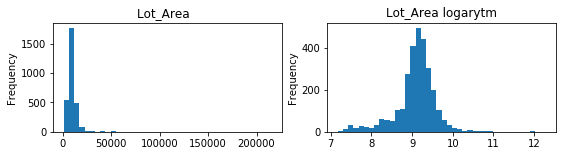

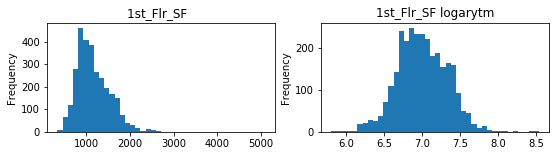

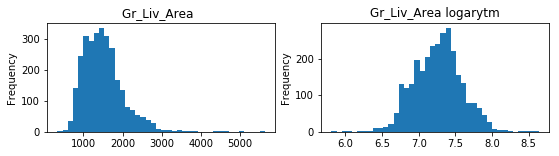

In [40]:
# zmienne potancjalne do zamiany na logarytm:

for col in ['Lot_Frontage', 'SalePrice', 'Lot_Area', '1st_Flr_SF', 'Gr_Liv_Area']:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    df08[col].plot(kind='hist', bins=40, figsize=(9,2), ax=axes[0]); axes[0].set_title('%s  ' %(col))
    np.log(df02[col]).plot(kind='hist', bins=40, figsize=(9,2), ax=axes[1]); axes[1].set_title('%s logarytm' %(col))
#     plt.hist(df02[col], color='b', bins=40)
#     plt.title('Histogram zmiennej %s' % (col))
    plt.show()



podsumowanie analizy rozkladow: wszystkie powyzsze zmienne:
'Lot_Frontage', 'SalePrice', 'Lot_Area', '1st_Flr_SF', 'Gr_Liv_Area'
przeksztalcam na wartosc logarytmu.
uzasadnienie: przeksztalcenie logarytmiczne dla danych zmiennych przybliza rozklady zmiennych\n
do rozkladu normalnego.

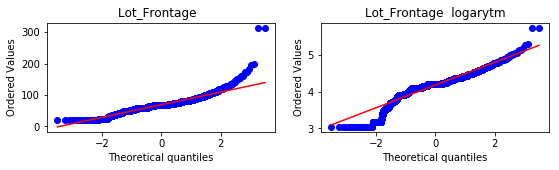

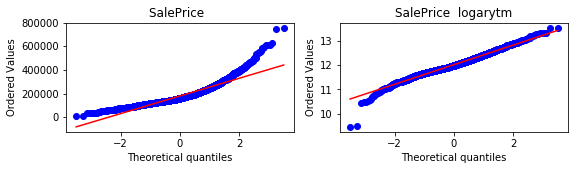

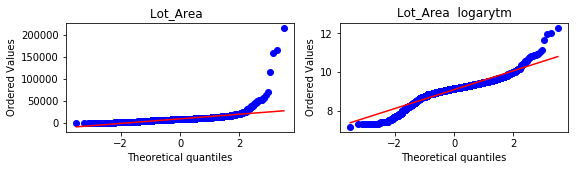

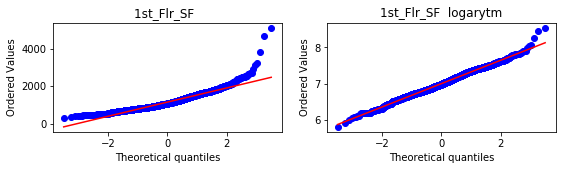

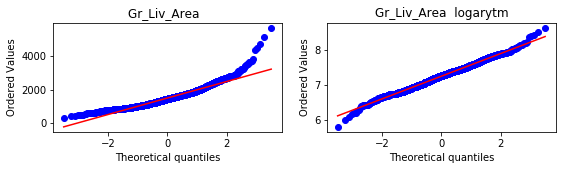

In [41]:
# w celu upewnienia sie, ze rozklady analizowanych zmiennych faktycznie \n
# sa blizsze do rozkladu normalnego po zlogararytmowaniu wartosci - to w tym celu \n
# generuje wykresy kwantylowe dla wybranych zmiennych
# w tym celu w pierwszej kolejnosci dodaje logarytmy danych zmiennych do zboru danych

import scipy.stats as stats

df09 = copy.deepcopy(df08)

for col in ['Lot_Frontage', 'SalePrice', 'Lot_Area', '1st_Flr_SF', 'Gr_Liv_Area']:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,2))
    x = df08[col]
    logx = np.log(df08[col])
    stats.probplot(x, dist=stats.norm,    plot=axes[0])  #.set_title('%s  ' %(col))
    stats.probplot(logx, dist=stats.norm, plot=axes[1])   #.set_title('%s logarytm' %(col))
    axes[0].set_title('%s  ' %(col))
    axes[1].set_title('%s  logarytm' %(col))
    

In [42]:
# wnioski: porownanie wykresow kwantylowych dla wybranych zmiennych ciaglych \n
# wskazuje, ze zamiana wartosci wybranych zmiennych na wartosci ich logarytmow jest \n
# uzasadniona.

df09 = copy.deepcopy(df08)

vars_for_log=['Lot_Frontage', 'SalePrice', 'Lot_Area', '1st_Flr_SF', 'Gr_Liv_Area']
for var in vars_for_log:
    print(df09.shape)   
    df09[var+"_log"]=np.log(df09[var])
    
df09.drop(columns=vars_for_log, inplace=True)

print(df08.shape)
print(df09.shape)
df09.head(4)

(2930, 80)
(2930, 81)
(2930, 82)
(2930, 83)
(2930, 84)
(2930, 80)
(2930, 80)


,Order,PID,MS_SubClass,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Sale_Condition,Garage_flag,Bsmt_flag,Years_from_built,Year_from_Remod,Lot_Frontage_log,SalePrice_log,Lot_Area_log,1st_Flr_SF_log,Gr_Liv_Area_log
0,1,526301100,20,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Normal,1,1,50,50,4.948760,12.278393,10.366278,7.412160,7.412160
1,2,526350040,20,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,1,1,49,49,4.382027,11.561716,9.360655,6.797940,6.797940
2,3,526351010,20,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Normal,1,1,52,52,4.394449,12.055250,9.565704,7.192182,7.192182
3,4,526353030,20,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,...,Normal,1,1,42,42,4.532599,12.404924,9.320091,7.654443,7.654443


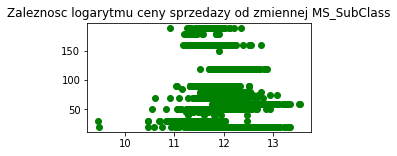

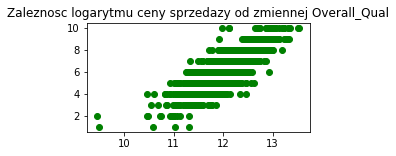

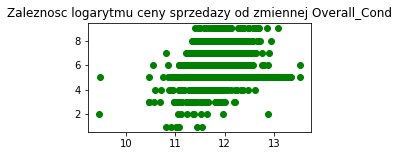

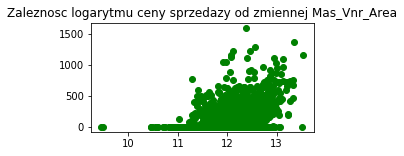

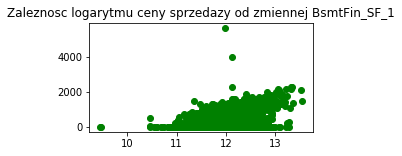

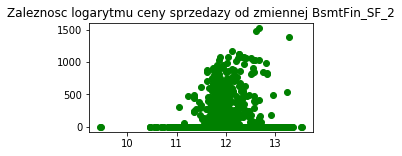

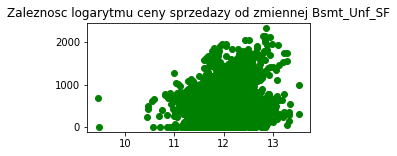

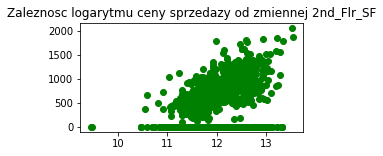

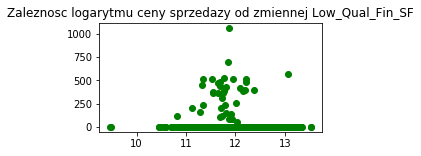

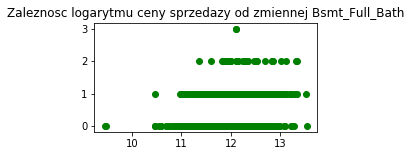

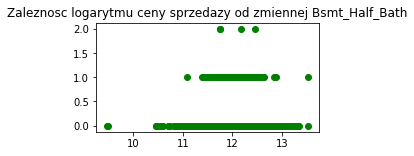

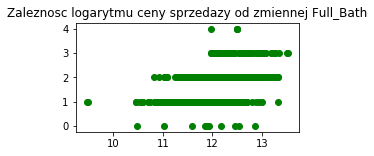

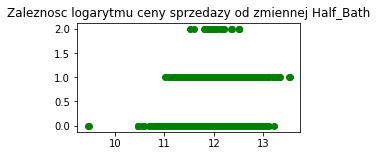

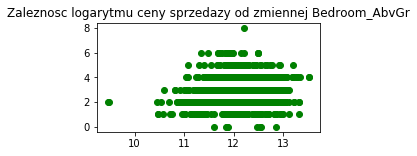

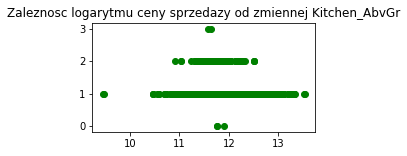

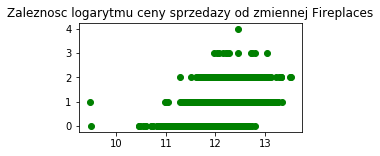

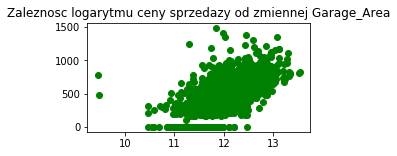

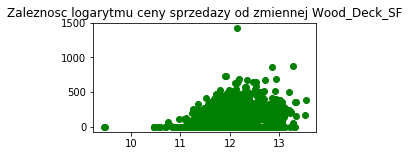

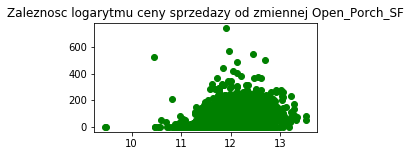

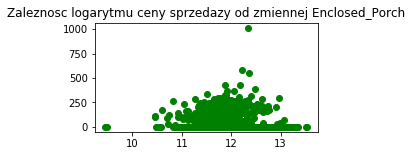

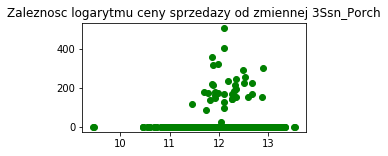

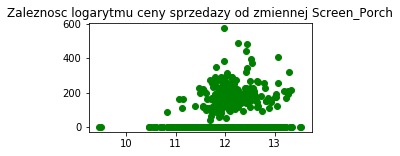

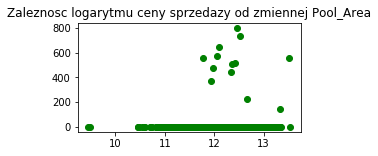

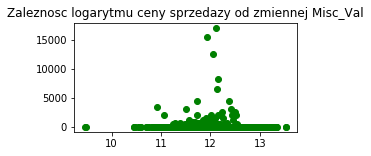

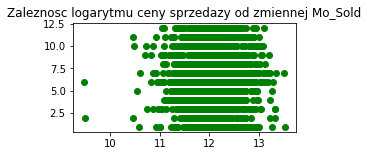

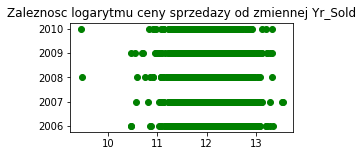

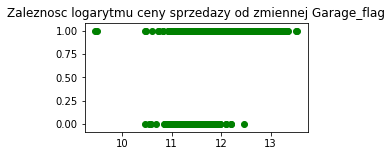

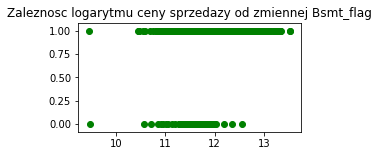

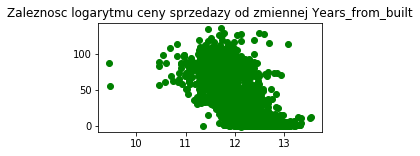

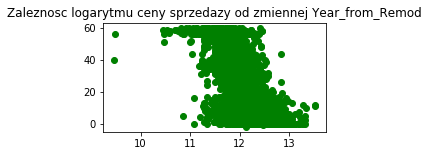

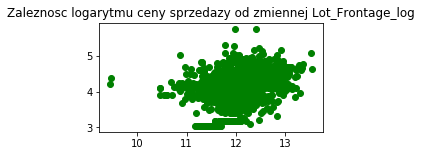

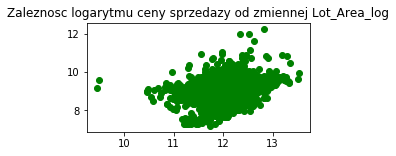

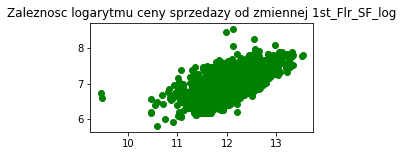

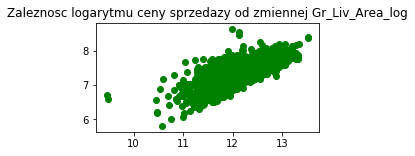

In [43]:
# Analize czyszczenia zmiennych numerycznych koncze przedstawieniem zaleznosci \n
# pomiedzy zmienna objasniana ("SalePrice_log") a pozostalymi numerycznymi zmiennymi \n
# objasniajacymi
vars_for_analysis = ['MS_SubClass',
       'Overall_Qual', 'Overall_Cond', 'Mas_Vnr_Area', 'BsmtFin_SF_1',
       'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Fireplaces','Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 
       'Enclosed_Porch','3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold',
       'Yr_Sold', 'Garage_flag', 'Bsmt_flag', 'Years_from_built',
       'Year_from_Remod', 'Lot_Frontage_log', 'Lot_Area_log', '1st_Flr_SF_log', 'Gr_Liv_Area_log']

# fig, axs = plt.subplots(1,1)
for col in vars_for_analysis:
    fig, axes = plt.subplots(1,1,figsize=(4,2))
#     tips['tip_pct'].plot.hist(bins=50)
#     plt.hist(df02[col], color='b', bins=40)
    plt.scatter(df09["SalePrice_log"], df09[col], color='g')
    plt.title('Zaleznosc logarytmu ceny sprzedazy od zmiennej %s' % (col))
     
#     axs[1].hist(np.log10(df03[col]), color='g', bins=40)
    plt.show()

In [44]:
# podsumowanie : na tym etapie koncze czyszczenie danych numerycznych \n
# - braki danych sa zaimputowane, zmienne wysoce skorelowane usuniete \n
#  a niektore zmienne poprawione ze wzgledu na zalozenie regresji liniowej \n
#  o rozkladzie normalnym zmiennych

In [45]:
# przechodze teraz do czyszczenia danych nienumerycznych
# po przestudiowaniu dokumentacji zbioru danych dochodze do wniosku, ze mozna stworzyc \n
# kilka zmiennych 0-1-kowych wskazujacych na posiadanie badz brak jakiejs cechy nieruchomosci
# garaz, basen, piwnica itd. zaczynam od stworzenia takich zmiennych


In [46]:
# zaczynam od informacji o Pool

df09['Pool_QC'].drop_duplicates()

0       NaN
1063     Ex
1498     Gd
1940     TA
2350     Fa
Name: Pool_QC, dtype: object

In [47]:
# pool processing

df10 = copy.deepcopy(df09)

print(df09.shape)
df10['Pool_flag'] = df09['Pool_QC'].map(lambda s: 0 if pd.isnull(s) else 1)
print(df10.shape)   

#Pool_QC - ranking
df10.loc[pd.isnull(df10["Pool_QC"]), "Pool_QC"]= "No_Pool"
print(df10.shape) 

df10['Pool_QC_rank'] = df10['Pool_QC'].map({'No_Pool': 0, 'Po':1, 'Fa': 2, 'TA' :3, 'Gd' :4, 'Ex' :5})
print(df10.shape) 

df10.drop('Pool_QC', axis=1, inplace=True)
print(df10.shape) 
print("Basement processing result: ")
df10.groupby(["Pool_QC_rank", "Pool_flag"])["Pool_QC_rank", "Pool_flag"].size().to_frame()


(2930, 80)
(2930, 81)
(2930, 81)
(2930, 82)
(2930, 81)
Basement processing result: 


,,0
Pool_QC_rank,Pool_flag,
0,0,2917
2,1,2
3,1,3
4,1,4
5,1,4


In [48]:
#  teraz basement processing

df10['Bsmt_Cond'].drop_duplicates()


0        Gd
1        TA
83      NaN
104      Po
170      Fa
1183     Ex
Name: Bsmt_Cond, dtype: object

In [49]:
# basement processing

df11 = copy.deepcopy(df10)

print(df11.shape)
df11['Bsmt_flag'] = df11['Bsmt_Cond'].map(lambda s: 0 if pd.isnull(s) else 1)
print(df11.shape)   

#ranking
df11.loc[pd.isnull(df11["Bsmt_Cond"]), "Bsmt_Cond"]= "No_Bsmt"
print(df11.shape) 

df11['Bsmt_rank'] = df11['Bsmt_Cond'].map({'No_Bsmt': 0, 'Po':1, 'Fa': 2, 'TA' :3, 'Gd' :4, 'Ex' :5})
print(df11.shape) 

df11.drop('Bsmt_Cond', axis=1, inplace=True)
print(df11.shape)
print("Basement processing result: ")
df11.groupby(["Bsmt_rank", "Bsmt_flag"])["Bsmt_rank", "Bsmt_flag"].size().to_frame()


(2930, 81)
(2930, 81)
(2930, 81)
(2930, 82)
(2930, 81)
Basement processing result: 


,,0
Bsmt_rank,Bsmt_flag,
0,0,80
1,1,5
2,1,104
3,1,2616
4,1,122
5,1,3


In [52]:
# Central_Air processing
 
df11['Central_Air'].drop_duplicates()

0     Y
82    N
Name: Central_Air, dtype: object

In [53]:
# Central_Air processing

df12 = copy.deepcopy(df11)
print(df12.shape)
df12['Central_Air_flag'] = df12['Central_Air'].map(lambda s: 1 if s == "Y" else 0)
print(df12.shape)
print("Central_Air processing result: ")
df12.groupby(["Central_Air", "Central_Air_flag"])["Central_Air", "Central_Air_flag"].size().to_frame()

(2930, 81)
(2930, 82)
Central_Air processing result: 


,,0
Central_Air,Central_Air_flag,
N,0,196
Y,1,2734


In [54]:
# Kitchen processing

df12['Kitchen_Qual'].drop_duplicates()


0      TA
2      Gd
3      Ex
130    Fa
210    Po
Name: Kitchen_Qual, dtype: object

In [55]:
# Kitchen processing

df13 = copy.deepcopy(df12)

print(df13.shape) 
df13['Kitchen_rank'] = df13['Kitchen_Qual'].map({'Po':1, 'Fa': 2, 'TA' :3, 'Gd' :4, 'Ex' :5})
print(df13.shape) 

df13.drop('Kitchen_Qual', axis=1, inplace=True)
print(df13.shape)
print("Kitchen processing result: ")
df13.groupby(['Kitchen_rank'])['Kitchen_rank'].size().to_frame()


(2930, 82)
(2930, 83)
(2930, 82)
Kitchen processing result: 


,Kitchen_rank
Kitchen_rank,
1,1
2,70
3,1494
4,1160
5,205


In [56]:
# Fireplace processing
df13.loc[:, ["Fireplace_Qu"]].drop_duplicates()

,Fireplace_Qu
0,Gd
1,NaN
3,TA
13,Po
17,Ex
24,Fa


In [57]:
# Fireplace processing


df14 = copy.deepcopy(df13)

# del df13

print(df14.shape)
df14['Fireplace_flag'] = df14['Fireplace_Qu'].map(lambda s: 0 if pd.isnull(s) else 1)
print(df14.shape)   

#ranking
df14.loc[pd.isnull(df14["Fireplace_Qu"]), "Fireplace_Qu"]= "No_Fireplace"
print(df14.shape) 

df14['Fireplace_rank'] = df14['Fireplace_Qu'].map({'No_Fireplace': 0, 'Po':1, 'Fa': 2, 'TA' :3, 'Gd' :4, 'Ex' :5})
print(df14.shape) 

df14.drop('Fireplace_Qu', axis=1, inplace=True)
print(df14.shape)
print("Fireplace processing result: ")
df14.groupby(["Fireplace_rank", "Fireplace_flag"])["Fireplace_rank", "Fireplace_flag"].size().to_frame()



(2930, 82)
(2930, 83)
(2930, 83)
(2930, 84)
(2930, 83)
Fireplace processing result: 


,,0
Fireplace_rank,Fireplace_flag,
0,0,1422
1,1,46
2,1,75
3,1,600
4,1,744
5,1,43


In [58]:
# Garage processing

df14.loc[:, ["Garage_Type", "Garage_Cond"]].drop_duplicates()



,Garage_Type,Garage_Cond
0,Attchd,TA
15,BuiltIn,TA
16,Basment,TA
18,Detchd,TA
27,NaN,NaN
181,Detchd,Fa
205,CarPort,TA
245,Attchd,Gd
246,2Types,TA
336,Attchd,Fa


In [59]:
df14.groupby(["Garage_Cond"])["Garage_Cond"].size().to_frame()

,Garage_Cond
Garage_Cond,
Ex,3
Fa,74
Gd,15
Po,14
TA,2665


In [60]:
# wniosek: brak danych w Garage_Cond uzupelniam dominanta = "TA"
# uzasadnienie: najwieksze prawdopodobienstwo wystapienia tej wartosci.

In [61]:
# Garage processing

df14.loc[pd.isnull(df14["Garage_Cond"]) & ~pd.isnull(df14["Garage_Type"]), "Garage_Cond"]="TA"
df14.loc[pd.isnull(df14["Garage_Cond"]) & pd.isnull(df14["Garage_Type"]), "Garage_Cond"]="No_Garage"
df14.loc[~pd.isnull(df14["Garage_Cond"]) & pd.isnull(df14["Garage_Type"]), "Garage_Type"]="No_Garage"


df15 = copy.deepcopy(df14)

print(df15.shape)   

df15['Garage_flag'] = df15['Garage_Type'].map(lambda s: 0 if s=="No_Garage" else 1)
print(df15.shape)

df15['Garage_rank'] = df15['Garage_Cond'].map({'No_Garage': 0,'Po':1, 'Fa': 2, 'TA' :3, 'Gd' :4, 'Ex' :5})
print(df15.shape) 

df15.drop('Garage_Cond', axis=1, inplace=True)

print(df15.shape)  
print("Garage processing result: ")
df15.groupby(["Garage_flag", "Garage_rank"])["Garage_rank", "Garage_flag"].size().to_frame()



(2930, 83)
(2930, 83)
(2930, 84)
(2930, 83)
Garage processing result: 


0
Garage_flag Garage_rank      
0           0             157
1           1              14
            2              74
            3            2667
            4              15
            5               3

In [62]:
# pozostaje jeszcze zmienna "Garage_Qual" - sprawdzam ja w powiazaniu z Garage_flag:
df15.loc[:, ["Garage_flag", "Garage_Qual"]].drop_duplicates()

,Garage_flag,Garage_Qual
0,1,TA
27,0,NaN
178,1,Fa
245,1,Gd
601,1,Ex
767,1,Po
1356,1,NaN


In [63]:
# i jeszcze spojrzenie na rozklad by sprawdzic co wykorzystac do imputacji brakow danych
df15.groupby(["Garage_flag", "Garage_Qual"])["Garage_flag", "Garage_Qual"].size().to_frame()

0
Garage_flag Garage_Qual      
1           Ex              3
            Fa            124
            Gd             24
            Po              5
            TA           2615

In [64]:
# Wniosek jednoznaczny: imputacja wartoscia "TA" - wyrazna dominanta. 
# finalnie zamieniam zmienna na ranking - bede w tedy spojny z wczesniej stworzonymi rankingami\n
# bazuja bowiem one na tych samych etykietach zmiennych nominalnych
# z drugiej stronu juz teraz widac, ze najprawdopodobniej zmienna 'Garage_Cond' jak i "Garage_Qual"\n
# sa ze soba silnie skorelowane
# stworze wiec drugi ranking dla "Garage_Qual" , ocenie poziom korelacji i zdecyduje czy \n
# usunac jedna ze zmennych czy tez nie.

df16 = copy.deepcopy(df15)

df16.loc[pd.isnull(df16['Garage_Qual']) & df16["Garage_flag"]==1, 'Garage_Qual']="TA"
df16.loc[pd.isnull(df16['Garage_Qual']), 'Garage_Qual']="No_Garage"

print(df16.shape) 
df16['Garage_Qual_rank'] = df16['Garage_Qual'].map({'No_Garage': 0,'Po':1, 'Fa': 2, 'TA' :3, 'Gd' :4, 'Ex' :5})
print(df16.shape) 
df16.loc[:, ["Garage_flag", "Garage_Qual", 'Garage_Qual_rank']].drop_duplicates()

(2930, 83)
(2930, 84)


,Garage_flag,Garage_Qual,Garage_Qual_rank
0,1,TA,3
27,0,No_Garage,0
178,1,Fa,2
245,1,Gd,4
601,1,Ex,5
767,1,Po,1


In [65]:
# Fence
df16.loc[:, ["Fence"]].drop_duplicates()

,Fence
0,NaN
1,MnPrv
11,GdPrv
70,GdWo
714,MnWw


In [66]:
# tworze nowa zmienna: Fence_flag a reszta: get_dummies 
# get_dummies zostanie zrobione hurtowo dla wszystkich zmiennych tego typu
print(df16.shape) 
df16['Fence_flag'] = df16['Fence'].map(lambda s: 0 if pd.isnull(s) else 1)
print(df16.shape) 
df16.loc[:, ["Fence", 'Fence_flag']].drop_duplicates()

(2930, 84)
(2930, 85)


,Fence,Fence_flag
0,NaN,0
1,MnPrv,1
11,GdPrv,1
70,GdWo,1
714,MnWw,1


In [67]:
# Alley
df16.loc[:, ["Alley"]].drop_duplicates()

,Alley
0,NaN
94,Pave
170,Grvl


In [68]:
print(df16.shape) 
df16['Alley_flag'] = df16['Alley'].map(lambda s: 0 if pd.isnull(s) else 1)
print(df16.shape) 
df16.loc[:, ["Alley", 'Alley_flag']].drop_duplicates()

(2930, 85)
(2930, 86)


,Alley,Alley_flag
0,NaN,0
94,Pave,1
170,Grvl,1


In [69]:
# teraz obsluga/processing zmiennych 'Mas_Vnr_Type', 'Misc_Feature'

df16.loc[:, ['Mas_Vnr_Type', 'Misc_Feature']].drop_duplicates()

,Mas_Vnr_Type,Misc_Feature
0,Stone,NaN
1,None,NaN
2,BrkFace,Gar2
5,BrkFace,NaN
11,None,Shed
23,BrkFace,Shed
55,NaN,NaN
89,BrkCmn,NaN
206,None,Othr
582,Stone,Shed


In [70]:
df16.groupby(["Mas_Vnr_Type"])["Mas_Vnr_Type"].size()

Mas_Vnr_Type
BrkCmn       25
BrkFace     880
CBlock        1
None       1752
Stone       249
Name: Mas_Vnr_Type, dtype: int64

In [71]:
# i imputacja przez None
df16.loc[pd.isnull(df16['Mas_Vnr_Type']), 'Mas_Vnr_Type']="None"
df16.loc[:, 'Mas_Vnr_Type'].drop_duplicates()

0         Stone
1          None
2       BrkFace
89       BrkCmn
2298     CBlock
Name: Mas_Vnr_Type, dtype: object

In [72]:
# teraz Misc_Feature
df16.groupby(["Misc_Feature"])["Misc_Feature"].size()

Misc_Feature
Elev     1
Gar2     5
Othr     4
Shed    95
TenC     1
Name: Misc_Feature, dtype: int64

In [73]:
# ze wzgledu na to, ze wartosci NaN stanowia tu prawie caly zbior obserwacji to zamieniam je na None
# imputacja dominanta, ktora w tym przypadku wynosi 95 z pewnoscia nie odzwierciedlalaby \n
# prawdziwego wyniku.

df16.loc[pd.isnull(df16['Misc_Feature']), 'Misc_Feature']="None"
print(df16.loc[:, 'Misc_Feature'].drop_duplicates())
df16.groupby(["Misc_Feature"])["Misc_Feature"].size()

0       None
2       Gar2
11      Shed
206     Othr
2180    Elev
2350    TenC
Name: Misc_Feature, dtype: object


Misc_Feature
Elev       1
Gar2       5
None    2824
Othr       4
Shed      95
TenC       1
Name: Misc_Feature, dtype: int64

In [74]:
# teraz zobaczmy wszystkie pozostale nienumeryczne zmienne i zdecydujmy z ktorych\n
# zrobic dummies
df_numeric = df16._get_numeric_data()
df_numeric.columns

Index(['Order', 'PID', 'MS_SubClass', 'Overall_Qual', 'Overall_Cond',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath',
       'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr',
       'Fireplaces', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF',
       'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val',
       'Mo_Sold', 'Yr_Sold', 'Garage_flag', 'Bsmt_flag', 'Years_from_built',
       'Year_from_Remod', 'Lot_Frontage_log', 'SalePrice_log', 'Lot_Area_log',
       '1st_Flr_SF_log', 'Gr_Liv_Area_log', 'Pool_flag', 'Pool_QC_rank',
       'Bsmt_rank', 'Central_Air_flag', 'Kitchen_rank', 'Fireplace_flag',
       'Fireplace_rank', 'Garage_rank', 'Garage_Qual_rank', 'Fence_flag',
       'Alley_flag'],
      dtype='object')

In [75]:
# wybieram wiec wszystkie kolumny, ktore nie naleza do zbioru numeric
not_numeric = []
for col in df16.columns:
    if col not in df_numeric.columns:
        not_numeric.append(col)
        
print(df16[not_numeric].columns)        
df16[not_numeric].head()    

Index(['MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour',
       'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC',
       'Central_Air', 'Electrical', 'Functional', 'Garage_Type',
       'Garage_Finish', 'Garage_Qual', 'Paved_Drive', 'Fence', 'Misc_Feature',
       'Sale_Type', 'Sale_Condition'],
      dtype='object')


,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Electrical,Functional,Garage_Type,Garage_Finish,Garage_Qual,Paved_Drive,Fence,Misc_Feature,Sale_Type,Sale_Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,Typ,Attchd,Fin,TA,P,NaN,None,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,SBrkr,Typ,Attchd,Unf,TA,Y,MnPrv,None,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,Typ,Attchd,Unf,TA,Y,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,Typ,Attchd,Fin,TA,Y,NaN,None,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,SBrkr,Typ,Attchd,Fin,TA,Y,MnPrv,None,WD,Normal


In [76]:
# lista zmiennych to get dummies:

to_get_dummies = ['Alley', 'MS_Zoning', 'Street', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 
                  'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type', 
                  'House_Style', 'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd','Exter_Qual', 
                  'Exter_Cond','Foundation','Bsmt_Exposure', 'BsmtFin_Type_1', 
                  'BsmtFin_Type_2', 'Misc_Feature', 'Mas_Vnr_Type', 
                  'Heating', 'Heating_QC', 'Electrical', 'Functional', 'Garage_Finish', 
                  'Paved_Drive', 'Fence', 'Sale_Type', 'Sale_Condition'
                 ]
df16[to_get_dummies].head(3)

,Alley,MS_Zoning,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Mas_Vnr_Type,Heating,Heating_QC,Electrical,Functional,Garage_Finish,Paved_Drive,Fence,Sale_Type,Sale_Condition
0,NaN,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Stone,GasA,Fa,SBrkr,Typ,Fin,P,NaN,WD,Normal
1,NaN,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,None,GasA,TA,SBrkr,Typ,Unf,Y,MnPrv,WD,Normal
2,NaN,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,BrkFace,GasA,TA,SBrkr,Typ,Unf,Y,NaN,WD,Normal


In [77]:
# dummies processing

df17 = copy.deepcopy(df16)
print(df17.shape)
for col in to_get_dummies:
    var_dummies = pd.get_dummies(df17[col], prefix=col)
    df17 = pd.concat([df17, var_dummies], axis=1)
    df17.drop(col, axis=1, inplace=True)
print(df17.shape)
  

(2930, 86)
(2930, 279)


In [79]:

columns_with_miss = []
for column in df17.columns:
    if df17.groupby([column]).size().sum() < len(df17):
        columns_with_miss.append(column)
        
print(f"columns_with_miss:  {columns_with_miss}\n")
print("*******************\n")
  
columns_without_miss = []
for column in df17.columns:
    if df17.groupby([column]).size().sum() == len(df17):
        columns_without_miss.append(column)
        
# print(f"columns_without_miss: {columns_without_miss}\n")        
# print("*******************\n")
print(len(columns_with_miss))
print(len(columns_without_miss))
print(len(columns_with_miss + columns_without_miss))

columns_with_miss:  ['Bsmt_Qual']

*******************

1
278
279


In [80]:
# Z analizy wynika, ze zmienna Bsmt_Qual jest jedyna z wartosciami NaN. 
# Jednak ze wzgledu na to, ze zmienna ta zostala wczesniej przeformulowana na ranking\n
# to ostatecznie tylko ja usuwam ze zbioru.

print(df17.shape)
df17.drop('Bsmt_Qual', axis=1, inplace=True)
print(df17.shape)

(2930, 279)
(2930, 278)


In [81]:

columns_with_miss = []
for column in df17.columns:
    if df17.groupby([column]).size().sum() < len(df17):
        columns_with_miss.append(column)
        
print(f"columns_with_miss:  {columns_with_miss}\n")
print("*******************\n")
  
columns_without_miss = []
for column in df17.columns:
    if df17.groupby([column]).size().sum() == len(df17):
        columns_without_miss.append(column)
        
# print(f"columns_without_miss: {columns_without_miss}\n")        
# print("*******************\n")
print(len(columns_with_miss))
print(len(columns_without_miss))
print(len(columns_with_miss + columns_without_miss))

columns_with_miss:  []

*******************

0
278
278


In [82]:
# teraz sprawdzam czy mam wszystkie zmienne numeryczne
len(df17._get_numeric_data().columns)

275

In [83]:
# pozostaly jeszcze zmienne nienumeryczne
not_numeric = []
for col in df17.columns:
        if col not in df17._get_numeric_data().columns:
            not_numeric.append(col)
not_numeric

['Central_Air', 'Garage_Type', 'Garage_Qual']

In [84]:
# 
print(df17.shape)
df17.drop(['Central_Air', 'Garage_Type', 'Garage_Qual'], axis=1, inplace=True)
print(df17.shape)

(2930, 278)
(2930, 275)


In [85]:
df18 = copy.deepcopy(df17)
not_numeric = []
for col in df18.columns:
        if col not in df18._get_numeric_data().columns:
            not_numeric.append(col)
not_numeric

[]

In [86]:
# wynik wskazuje na to, ze juz nie ma zmiennych nienumerycznych

In [87]:
# jeszcze jedno sprawdzenie przez get dummies - jesli nie ma zmiennych nienumerycznych\n
# to shape zbioru danych nie ulegnie zmianie.
df19 = pd.get_dummies(df18)

In [88]:
print(df18.shape)
print(df19.shape)

(2930, 275)
(2930, 275)


In [89]:
# powyzszy wynik rowniez wskazuje, ze nie ma nienumerycznych zmiennych\n
# poniewaz nie mozna bylo wykonac przeksztalcenia get_dummies na calym zbiorze danych

In [90]:
# na ostatnim etapie czyszczenia danych robie przeglad nazw zmiennych/ kolumn zeby \n
# tzw. "ocznie" sprawdzic czy wszystko mi pasuje - i jak faktycznie wyglada efekt \n
# wykonania przeksztalcenia get dummies.
# patrze sie osobno na zestawy po 50 zmiennych.

In [91]:
print(len(df19.iloc[:, 0:50].columns))
df19.iloc[:, 0:50].columns


50


Index(['Order', 'PID', 'MS_SubClass', 'Overall_Qual', 'Overall_Cond',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath',
       'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr',
       'Fireplaces', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF',
       'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val',
       'Mo_Sold', 'Yr_Sold', 'Garage_flag', 'Bsmt_flag', 'Years_from_built',
       'Year_from_Remod', 'Lot_Frontage_log', 'SalePrice_log', 'Lot_Area_log',
       '1st_Flr_SF_log', 'Gr_Liv_Area_log', 'Pool_flag', 'Pool_QC_rank',
       'Bsmt_rank', 'Central_Air_flag', 'Kitchen_rank', 'Fireplace_flag',
       'Fireplace_rank', 'Garage_rank', 'Garage_Qual_rank', 'Fence_flag',
       'Alley_flag', 'Alley_Grvl', 'Alley_Pave'],
      dtype='object')

In [92]:
print(len(df19.iloc[:, 50:100].columns))
df19.iloc[:, 50:100].columns

50


Index(['MS_Zoning_A (agr)', 'MS_Zoning_C (all)', 'MS_Zoning_FV',
       'MS_Zoning_I (all)', 'MS_Zoning_RH', 'MS_Zoning_RL', 'MS_Zoning_RM',
       'Street_Grvl', 'Street_Pave', 'Lot_Shape_IR1', 'Lot_Shape_IR2',
       'Lot_Shape_IR3', 'Lot_Shape_Reg', 'Land_Contour_Bnk',
       'Land_Contour_HLS', 'Land_Contour_Low', 'Land_Contour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'Utilities_NoSewr',
       'Lot_Config_Corner', 'Lot_Config_CulDSac', 'Lot_Config_FR2',
       'Lot_Config_FR3', 'Lot_Config_Inside', 'Land_Slope_Gtl',
       'Land_Slope_Mod', 'Land_Slope_Sev', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
    

In [93]:
print(len(df19.iloc[:, 100:150].columns))
df19.iloc[:, 100:150].columns

50


Index(['Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition_1_Artery', 'Condition_1_Feedr', 'Condition_1_Norm',
       'Condition_1_PosA', 'Condition_1_PosN', 'Condition_1_RRAe',
       'Condition_1_RRAn', 'Condition_1_RRNe', 'Condition_1_RRNn',
       'Condition_2_Artery', 'Condition_2_Feedr', 'Condition_2_Norm',
       'Condition_2_PosA', 'Condition_2_PosN', 'Condition_2_RRAe',
       'Condition_2_RRAn', 'Condition_2_RRNn', 'Bldg_Type_1Fam',
       'Bldg_Type_2fmCon', 'Bldg_Type_Duplex', 'Bldg_Type_Twnhs',
       'Bldg_Type_TwnhsE', 'House_Style_1.5Fin', 'House_Style_1.5Unf',
       'House_Style_1Story', 'House_Style_2.5Fin', 'House_Style_2.5Unf',
       'House_Style_2Story', 'House_Style_SFoyer', 'House_Style_SLvl',
       'Roof_Style_Flat', 'Roof_Style_Gable', 'Roof_Style_Gambrel',
       'Roof_Style_Hip', 'Roof_Style_Mansard', 'Roof_Style_Shed',
       'Roof_Matl_ClyTi

In [94]:
print(len(df19.iloc[:, 150:200].columns))
df19.iloc[:, 150:200].columns

50


Index(['Exterior_1st_AsbShng', 'Exterior_1st_AsphShn', 'Exterior_1st_BrkComm',
       'Exterior_1st_BrkFace', 'Exterior_1st_CBlock', 'Exterior_1st_CemntBd',
       'Exterior_1st_HdBoard', 'Exterior_1st_ImStucc', 'Exterior_1st_MetalSd',
       'Exterior_1st_Plywood', 'Exterior_1st_PreCast', 'Exterior_1st_Stone',
       'Exterior_1st_Stucco', 'Exterior_1st_VinylSd', 'Exterior_1st_Wd Sdng',
       'Exterior_1st_WdShing', 'Exterior_2nd_AsbShng', 'Exterior_2nd_AsphShn',
       'Exterior_2nd_Brk Cmn', 'Exterior_2nd_BrkFace', 'Exterior_2nd_CBlock',
       'Exterior_2nd_CmentBd', 'Exterior_2nd_HdBoard', 'Exterior_2nd_ImStucc',
       'Exterior_2nd_MetalSd', 'Exterior_2nd_Other', 'Exterior_2nd_Plywood',
       'Exterior_2nd_PreCast', 'Exterior_2nd_Stone', 'Exterior_2nd_Stucco',
       'Exterior_2nd_VinylSd', 'Exterior_2nd_Wd Sdng', 'Exterior_2nd_Wd Shng',
       'Exter_Qual_Ex', 'Exter_Qual_Fa', 'Exter_Qual_Gd', 'Exter_Qual_TA',
       'Exter_Cond_Ex', 'Exter_Cond_Fa', 'Exter_Cond_Gd', 'Exter_C

In [95]:
print(len(df19.iloc[:, 200:].columns))
df19.iloc[:, 200:].columns

75


Index(['Bsmt_Exposure_Mn', 'Bsmt_Exposure_No', 'BsmtFin_Type_1_ALQ',
       'BsmtFin_Type_1_BLQ', 'BsmtFin_Type_1_GLQ', 'BsmtFin_Type_1_LwQ',
       'BsmtFin_Type_1_Rec', 'BsmtFin_Type_1_Unf', 'BsmtFin_Type_2_ALQ',
       'BsmtFin_Type_2_BLQ', 'BsmtFin_Type_2_GLQ', 'BsmtFin_Type_2_LwQ',
       'BsmtFin_Type_2_Rec', 'BsmtFin_Type_2_Unf', 'Misc_Feature_Elev',
       'Misc_Feature_Gar2', 'Misc_Feature_None', 'Misc_Feature_Othr',
       'Misc_Feature_Shed', 'Misc_Feature_TenC', 'Mas_Vnr_Type_BrkCmn',
       'Mas_Vnr_Type_BrkFace', 'Mas_Vnr_Type_CBlock', 'Mas_Vnr_Type_None',
       'Mas_Vnr_Type_Stone', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Heating_QC_Ex',
       'Heating_QC_Fa', 'Heating_QC_Gd', 'Heating_QC_Po', 'Heating_QC_TA',
       'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_Mix', 'Electrical_SBrkr', 'Functional_2019-05-01 00:00:00',
       'Functional_2019-05-02 00:00:00', 'Functional

In [96]:
# dla porzadku i zachowania konwencji nazewnictwa\n
# na koniec jeszcze raz usuwam spacje pomiedzy nazwami zmiennych
df20 = copy.deepcopy(df19)
columns =[]
for column in df20.columns:
    columns.append(column)

new_columns=[]
for column in columns:
    column_new = column.translate(str.maketrans(" ", "_"))
    new_columns.append(column_new)


for z in zip(columns, new_columns):
    column, column_new = z
    df20.rename(columns={column: column_new}, inplace=True)
    
print(len(df20.columns))
df20.iloc[:, 0:50].columns

275


Index(['Order', 'PID', 'MS_SubClass', 'Overall_Qual', 'Overall_Cond',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath',
       'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr',
       'Fireplaces', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF',
       'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val',
       'Mo_Sold', 'Yr_Sold', 'Garage_flag', 'Bsmt_flag', 'Years_from_built',
       'Year_from_Remod', 'Lot_Frontage_log', 'SalePrice_log', 'Lot_Area_log',
       '1st_Flr_SF_log', 'Gr_Liv_Area_log', 'Pool_flag', 'Pool_QC_rank',
       'Bsmt_rank', 'Central_Air_flag', 'Kitchen_rank', 'Fireplace_flag',
       'Fireplace_rank', 'Garage_rank', 'Garage_Qual_rank', 'Fence_flag',
       'Alley_flag', 'Alley_Grvl', 'Alley_Pave'],
      dtype='object')

In [99]:
# w tym momencie koncze etap czyszczenia danych i przechodze do etapu\n
# wyboru zmiennych do modelowania.
# przed estymacja modelu klasycznej regresji liniowej ogranicze zbior potencjalnych zmiennych
# objasniajacych do zmiennych najbardziej istotnych.



In [100]:
# df20.loc[:,'SalePrice_log'].head()

y = df20.loc[:,'SalePrice_log'].to_frame()

X0 = df20.drop(['SalePrice_log','Order'] , axis=1, inplace=False)
print(y.shape)
print(X0.shape)

(2930, 1)
(2930, 273)


In [101]:
# przed zastosowanie klasycznej regresji liniowej pozbywam sie \n
# najbardziej skorelowanych zmiennych objasniajacych

korelacje = X0.corr("pearson")

korelacje = korelacje.where(np.triu(np.ones(korelacje.shape, dtype=np.bool), k=1)).stack().sort_values()
korelacje[abs(korelacje)>0.7] 

values = pd.DataFrame(korelacje[abs(korelacje)>0.7])
print(len(values))
values


50


,,0
Street_Grvl,Street_Pave,-1.000000
Misc_Feature_None,Misc_Feature_Shed,-0.944854
Roof_Style_Gable,Roof_Style_Hip,-0.939523
Land_Slope_Gtl,Land_Slope_Mod,-0.938865
Lot_Shape_IR1,Lot_Shape_Reg,-0.933271
Exter_Qual_Gd,Exter_Qual_TA,-0.900264
Exter_Cond_Gd,Exter_Cond_TA,-0.871962
Paved_Drive_N,Paved_Drive_Y,-0.871337
Electrical_FuseA,Electrical_SBrkr,-0.861090
Utilities_AllPub,Utilities_NoSewr,-0.816357


In [102]:
correlated = [
'Street_Grvl','Misc_Feature_None', 'Roof_Style_Gable', 'Land_Slope_Gtl', 'Lot_Shape_IR1',
'Exter_Qual_Gd',
'Exter_Cond_Gd', 'Paved_Drive_N', 'Electrical_FuseA', 'Utilities_AllPub', 'MS_SubClass', 
'Mas_Vnr_Type_BrkFace', 'MS_Zoning_RL', '2nd_Flr_SF', 'Bsmt_flag', 'Foundation_CBlock', 
'Heating_GasA',
'Lot_Config_Corner', 'Sale_Type_New', 'Sale_Type_WD_', 'Roof_Matl_CompShg', 'BsmtFin_SF_2', 
'Exterior_1st_AsphShn', 'Fence_flag', 
'Exterior_1st_PreCast', 'Sale_Type_New', 'Exterior_1st_CemntBd', 'Exterior_1st_VinylSd',
'Exterior_1st_MetalSd', 'Pool_flag', 'Fireplace_flag', 'Garage_rank','Garage_flag',
'Pool_Area',  'Garage_flag', 'Fireplaces',  'Exterior_1st_HdBoard', 'MS_Zoning_FV',
'Exterior_1st_Wd_Sdng', 'Pool_Area', 'MS_Zoning_FV', 'Exterior_1st_Wd_Sdng',     
'MS_Zoning_FV', 'Exterior_1st_AsbShng', '2nd_Flr_SF',  'Neighborhood_NPkVill',
'Roof_Style_Flat','Alley_flag', 'Kitchen_AbvGr', 'Exterior_1st_Plywood',      
'Exterior_1st_Stucco',  
    
'Fireplaces', 'MS_Zoning_FV', '2nd_Flr_SF', 'Bsmt_flag','Foundation_CBlock',
'Heating_GasA', 'Lot_Config_Corner','Sale_Type_New',  

'Exterior_1st_PreCast', 'Sale_Type_New', 'Exterior_1st_CemntBd', 'Exterior_1st_VinylSd',
'Exterior_1st_MetalSd', 'Pool_flag', 'Fireplace_flag', 'Garage_rank','Garage_flag',
'Pool_Area',  'Garage_flag', 'Fireplaces',  'Exterior_1st_HdBoard', 'MS_Zoning_FV',
'Exterior_1st_Wd_Sdng', 'Pool_Area', 'MS_Zoning_FV', 'Exterior_1st_Wd_Sdng',     
'MS_Zoning_FV', 'Exterior_1st_AsbShng',  '2nd_Flr_SF',  'Neighborhood_NPkVill',
'Roof_Style_Flat','Alley_flag', 'Kitchen_AbvGr', 'Exterior_1st_Plywood',      
'Exterior_1st_Stucco', 'Fence_flag'
]

In [103]:
correlated2 = set(correlated)
len(correlated2)

44

In [104]:
correlated3=[]
for item in set(correlated):
    correlated3.append(item)
    
correlated3    

['Garage_rank',
 'Street_Grvl',
 'Exterior_1st_Stucco',
 'Exterior_1st_VinylSd',
 'Garage_flag',
 'Roof_Style_Gable',
 'Exterior_1st_MetalSd',
 'MS_Zoning_RL',
 'Alley_flag',
 'Pool_Area',
 'Paved_Drive_N',
 'Exterior_1st_AsbShng',
 '2nd_Flr_SF',
 'Kitchen_AbvGr',
 'Lot_Shape_IR1',
 'MS_Zoning_FV',
 'Sale_Type_New',
 'Lot_Config_Corner',
 'Fireplace_flag',
 'Exterior_1st_Wd_Sdng',
 'Bsmt_flag',
 'Foundation_CBlock',
 'Exterior_1st_CemntBd',
 'Fireplaces',
 'Exter_Qual_Gd',
 'Exterior_1st_HdBoard',
 'Exterior_1st_Plywood',
 'Utilities_AllPub',
 'Exterior_1st_PreCast',
 'Roof_Matl_CompShg',
 'Roof_Style_Flat',
 'Sale_Type_WD_',
 'Heating_GasA',
 'Neighborhood_NPkVill',
 'Exterior_1st_AsphShn',
 'MS_SubClass',
 'Misc_Feature_None',
 'Electrical_FuseA',
 'Fence_flag',
 'Land_Slope_Gtl',
 'Exter_Cond_Gd',
 'BsmtFin_SF_2',
 'Pool_flag',
 'Mas_Vnr_Type_BrkFace']

In [105]:
# wyrzcam kazda zmienna ze znalezionej pary i tworze zbior X1

X1 = X0.drop(correlated3, axis=1, inplace=False)
print(X0.shape)
print(X1.shape)

(2930, 273)
(2930, 229)


Informacja o metodzie Randomized Lasso.

Randomized Lasso works by resampling the train data and computing a Lasso on each resampling. In short, the features selected more often are good features. 
It is also known as stability selection.


In [107]:
# wykorzystuje metode Randomized Lasso to wyboru najbardziej istotnych zmiennych do\n
# modelu regresji liniowej
# estymacje modelu Randomized Lasso przeprowadzam na calym zbiorze danych poniewaz nie bede\n
# wykorzystywal tego modelu do prognozowania.
# model sluzy mi tylko do redukcji zbioru na podtzeby dalszej estymacji metoda klasycznej\n
# regresji liniowej.

Randlasso = RandomizedLasso(alpha='aic', scaling=0.5, n_resampling = 50, 
                            sample_fraction = 0.75, fit_intercept=True, 
                            verbose = True, normalize=True, max_iter=500, 
                            n_jobs = 1,random_state=42)
Randlasso.fit(X1, y)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWa

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip inst

RandomizedLasso(alpha='aic', eps=2.220446049250313e-16, fit_intercept=True,
        max_iter=500, memory=None, n_jobs=1, n_resampling=50,
        normalize=True, pre_dispatch='3*n_jobs', precompute='auto',
        random_state=42, sample_fraction=0.75, scaling=0.5,
        selection_threshold=0.25, verbose=True)

In [108]:
# tworze plik pkl z ktorego bede pobieral parametry modelu

fh = open('/home/kodolamacz/data_science_sages/Felicjan_Jagus_zaliczenie/randLasso01.pkl', 'wb')
pickle.dump(Randlasso, fh)
fh.close()

In [109]:
# pobieram wyestymowane parametry modelu Randomized Lasso

RL = open('/home/kodolamacz/data_science_sages/Felicjan_Jagus_zaliczenie/randLasso01.pkl', 'rb')
model_Randlasso = pickle.load(RL)
RL.close()
coef = model_Randlasso.all_scores_

In [110]:
# sprawdzam metaparametry modelu Randomized Lasso
model_Randlasso

RandomizedLasso(alpha='aic', eps=2.220446049250313e-16, fit_intercept=True,
        max_iter=500, memory=None, n_jobs=1, n_resampling=50,
        normalize=True, pre_dispatch='3*n_jobs', precompute='auto',
        random_state=42, sample_fraction=0.75, scaling=0.5,
        selection_threshold=0.25, verbose=True)

In [111]:
# nastepnie wykorzystuje wyestymowane wartosci modelu do wyboru najbardziej istotnych \n
# zmiennych do dalszej analizy.

idx = np.where(np.abs(coef) >=0.99)
idx = idx[0]
print(len(idx))
print(len(coef))
print(idx)

X1.iloc[:, idx].columns.values

d = dict(list(zip(X1.iloc[:, idx].columns.values,coef[idx])))
selected = pd.DataFrame.from_dict(d)
vars_selected = selected.columns
vars_selected

8
229
[  1   4  12  21  25  26  30 223]


Index(['Overall_Qual', 'BsmtFin_SF_1', 'Garage_Area', 'Years_from_built',
       '1st_Flr_SF_log', 'Gr_Liv_Area_log', 'Kitchen_rank',
       'Sale_Condition_Abnorml'],
      dtype='object')

In [112]:
# przechodze do budowy modelu klasycznej regresji liniowej.
# do estymacji modelu wykorzystuje zmienne wyselekcjonowane metoda Randomized Lasso.


In [113]:
X2 = X1[vars_selected]
X2.head()

,Overall_Qual,BsmtFin_SF_1,Garage_Area,Years_from_built,1st_Flr_SF_log,Gr_Liv_Area_log,Kitchen_rank,Sale_Condition_Abnorml
0,6,639.0,528.0,50,7.412160,7.412160,3,0
1,5,468.0,730.0,49,6.797940,6.797940,3,0
2,6,923.0,312.0,52,7.192182,7.192182,4,0
3,7,1065.0,522.0,42,7.654443,7.654443,5,0
4,5,791.0,482.0,13,6.833032,7.395722,3,0


In [114]:
y.head()

,SalePrice_log
0,12.278393
1,11.561716
2,12.055250
3,12.404924
4,12.154253


In [115]:
# definiuje miary jakosci dzialania modeli regresyjnych (model performance measures)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.asarray(y_true) - np.asarray(y_pred)))

def root_mean_square_error(y_true, y_pred):
    return np.sqrt(np.mean((np.asarray(y_true) - np.asarray(y_pred))**2))

from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

mean_absolute_error: 0.101485799949978
root_mean_square_error: 0.1441976983582043
median_absolute_error: 0.07334135790542007
r2_score: 0.8578956487967043


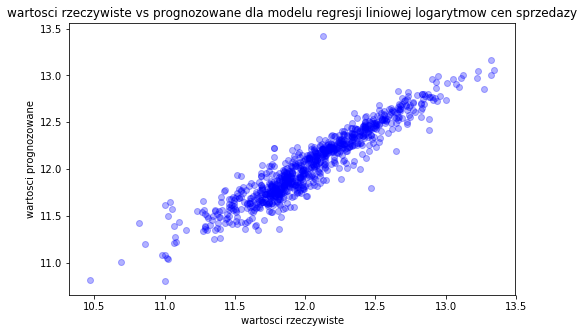

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


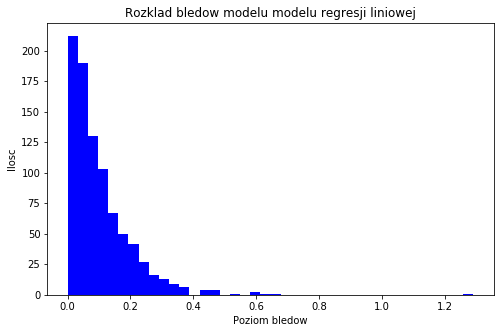

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model_mnk=LinearRegression()

X=X2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_mnk.fit(X_train, y_train)
model_mnk.coef_

y_pred = model_mnk.predict(X_test)

MAE_values =  mean_absolute_error(y_pred, y_test)
RMSE_values = root_mean_square_error(y_pred, y_test)
MEAE_values = median_absolute_error(y_pred, y_test)
r2_values =   r2_score(y_pred, y_test)

print(f"mean_absolute_error: {mean_absolute_error(y_pred, y_test)}")
print(f"root_mean_square_error: {root_mean_square_error(y_pred, y_test)}")
print(f"median_absolute_error: {median_absolute_error(y_pred, y_test)}")
print(f"r2_score: {r2_score(y_pred, y_test)}")

model_error = np.abs(y_pred-y_test)
fig, axes = plt.subplots(1,1, figsize=(8,5))
plt.scatter(y_test, y_pred, color='b', alpha=0.3)
plt.title('wartosci rzeczywiste vs prognozowane dla modelu regresji liniowej logarytmow cen sprzedazy')
plt.xlabel('wartosci rzeczywiste')
plt.ylabel('wartosci prognozowane')
plt.show()

y_test['lin_reg_residuals'] = np.abs(y_pred-y_test)
fig, axes = plt.subplots(1,1, figsize=(8,5))
plt.hist(y_test['lin_reg_residuals'], color='b', bins=40)
plt.title('Histogram zmiennej')
plt.title('Rozklad bledow modelu modelu regresji liniowej')
plt.xlabel('Poziom bledow')
plt.ylabel('Ilosc')
plt.show()


In [117]:
# Wniosek: Srednio rzecz biorac model regresji liniowej 
# w ponad 85% wyjasnia zmiennosc wartosci logarytmow cen domow ceny
# rozklad bledow modelu jest silnie skoncentrowany wokol wartosci zero wskazujac na
# dobre dopasowanie modelu do danych empirycznych.



In [118]:
d = {     
          'mean_absolute_error':    MAE_values, 
          'root_mean_square_error': RMSE_values, 
          'median_absolute_error':  MEAE_values,
          'r2_score':               r2_values
    } 
    
df = pd.DataFrame(data=d, index=["Regresja liniowa"])
df

,mean_absolute_error,root_mean_square_error,median_absolute_error,r2_score
Regresja liniowa,0.101486,0.144198,0.073341,0.857896


In [ ]:
# sprobuje teraz zastosowac alternatywna metode selekcji zmiennych do modelu regresji 
# liniowej - algorytm SelectKBest zaimplementowany w module sklearn.feature_selection

In [126]:
from sklearn.feature_selection import SelectKBest, f_regression

feat_selector = SelectKBest(f_regression, k=10)
_ = feat_selector.fit(X1, y)
    
feat_scores = pd.DataFrame()
feat_scores["F Score"] = feat_selector.scores_
feat_scores["P Value"] = feat_selector.pvalues_
feat_scores["Support"] = feat_selector.get_support()
feat_scores["Attribute"] = X1.columns
f_regression_selected = feat_scores[feat_scores.Support==True]
f_regression_selected


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,F Score,P Value,Support,Attribute
1,6270.569392,0.000000e+00,True,Overall_Qual
9,1463.877343,4.236895e-260,True,Full_Bath
12,2154.984249,0.000000e+00,True,Garage_Area
21,1790.346183,1.024665e-305,True,Years_from_built
22,1549.605216,2.126911e-272,True,Year_from_Remod
25,1766.364199,1.787575e-302,True,1st_Flr_SF_log
26,3209.969591,0.000000e+00,True,Gr_Liv_Area_log
30,2345.442219,0.000000e+00,True,Kitchen_rank
31,1242.328565,3.647592e-227,True,Fireplace_rank
149,1534.321446,3.185080e-270,True,Exter_Qual_TA


In [138]:
# tworze liste wyselekcjonowanych zmiennych metoda SelectKBest - f_regression

d = f_regression_selected['Attribute'].to_frame()
list(set(d['Attribute']))

['Fireplace_rank',
 'Garage_Area',
 'Full_Bath',
 'Overall_Qual',
 'Gr_Liv_Area_log',
 'Years_from_built',
 '1st_Flr_SF_log',
 'Year_from_Remod',
 'Exter_Qual_TA',
 'Kitchen_rank']

In [139]:
X3 = X1[list(set(d['Attribute']))]
X3.head()

,Fireplace_rank,Garage_Area,Full_Bath,Overall_Qual,Gr_Liv_Area_log,Years_from_built,1st_Flr_SF_log,Year_from_Remod,Exter_Qual_TA,Kitchen_rank
0,4,528.0,1,6,7.412160,50,7.412160,50,1,3
1,0,730.0,1,5,6.797940,49,6.797940,49,1,3
2,0,312.0,1,6,7.192182,52,7.192182,52,1,4
3,3,522.0,2,7,7.654443,42,7.654443,42,0,5
4,3,482.0,2,5,7.395722,13,6.833032,12,1,3


mean_absolute_error: 0.10682019117014918
root_mean_square_error: 0.14771887005226264
median_absolute_error: 0.08101439385279186
r2_score: 0.8519792313474309


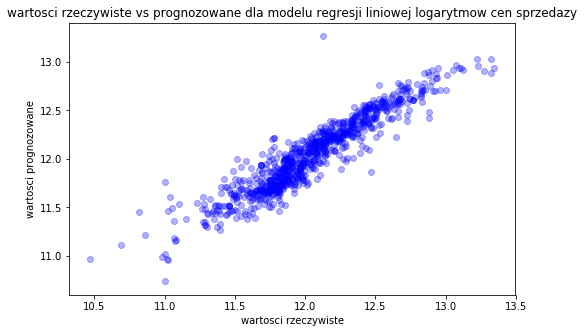

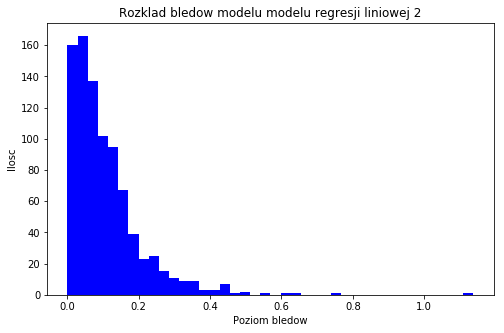

In [189]:
# estymuje i oceniam jakosc modelu regresji liniowej, w ktorej zmienne objasiajace zostaly 
# wybrane przy wykorzystaniu algorytmu SelectKBest - f_regression.

model_mnk2=LinearRegression()

X=X3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_mnk2.fit(X_train, y_train)
model_mnk2.coef_

y_pred = model_mnk2.predict(X_test)

MAE_values =  mean_absolute_error(y_pred, y_test)
RMSE_values = root_mean_square_error(y_pred, y_test)
MEAE_values = median_absolute_error(y_pred, y_test)
r2_values =   r2_score(y_pred, y_test)

print(f"mean_absolute_error: {mean_absolute_error(y_pred, y_test)}")
print(f"root_mean_square_error: {root_mean_square_error(y_pred, y_test)}")
print(f"median_absolute_error: {median_absolute_error(y_pred, y_test)}")
print(f"r2_score: {r2_score(y_pred, y_test)}")

fig, axes = plt.subplots(1,1, figsize=(8,5))
plt.scatter(y_test, y_pred, color='b', alpha=0.3)
plt.title('wartosci rzeczywiste vs prognozowane dla modelu regresji liniowej logarytmow cen sprzedazy')
plt.xlabel('wartosci rzeczywiste')
plt.ylabel('wartosci prognozowane')
plt.show()

residual = pd.DataFrame(data=np.abs(y_pred-y_test))

fig, axes = plt.subplots(1,1, figsize=(8,5))
plt.hist(residual.iloc[:,0], color='b', bins=40)
plt.title('Histogram zmiennej')
plt.title('Rozklad bledow modelu modelu regresji liniowej 2')
plt.xlabel('Poziom bledow')
plt.ylabel('Ilosc')
plt.show()

In [145]:
d2 = {     
          'mean_absolute_error':    MAE_values, 
          'root_mean_square_error': RMSE_values, 
          'median_absolute_error':  MEAE_values,
          'r2_score':               r2_values
    } 
    
dfreg2 = pd.DataFrame(data=d2, index=["Regresja liniowa_2"])
dfreg2

,mean_absolute_error,root_mean_square_error,median_absolute_error,r2_score
Regresja liniowa_2,0.10682,0.147719,0.081014,0.851979


In [146]:
dfreg3 = pd.concat([df, dfreg2], axis=0)
dfreg3

,mean_absolute_error,root_mean_square_error,median_absolute_error,r2_score
Regresja liniowa,0.101486,0.144198,0.073341,0.857896
Regresja liniowa_2,0.106820,0.147719,0.081014,0.851979


Wniosek: 
Wartosci miar jakosci dopasowania prognoz do danych empirycznych(obserwowalnych)
sa tak bardzo zblizone, ze mozna uznac iz modele: Regresja liniowa oraz Regresja liniowa_2
cechuje taka sama skutecznosc (performance).

W ostatnim etapie modelowania przetestuje wiele kombinacji metaparametrow alternatywnych
modeli do regresji liniowej.
Przetestowane zostana nastepujace algorytmy:
    1. Regresja liniowa z uwzglednieniem glownych skladowych jako zmiennych objasniajacych.
    2. Regresja grzbietowa.
    3. Regresja grzbietowa z uwzglednieniem glownych skladowych jako zmiennych objasniajacych.
    4. Drzewo regresyjne.
    5. Las regresyjny.
    6. Gradient Boosting regressor.
Analiza ta bedzie przebiegac w dwoch etapach:
    1. W pierwszym etapie wybrany zostanie najlepszy zestaw metaparametrow kazdej z 6 algorytmow/ modeli.
    2. W drugim etapie zostana one poddane oceie jakosci dopasowania ich prognoz do danych obserwowalnych.
    

,PID,MS_SubClass,Overall_Qual,Overall_Cond,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,2nd_Flr_SF,Low_Qual_Fin_SF,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD_,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,526301100,20,6,5,112.0,639.0,0.0,441.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,526350040,20,5,6,0.0,468.0,144.0,270.0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,526351010,20,6,6,108.0,923.0,0.0,406.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,526353030,20,7,5,0.0,1065.0,0.0,1045.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,527105010,60,5,5,0.0,791.0,0.0,137.0,701,0,...,0,0,0,1,0,0,0,0,1,0


In [175]:
# definiuje miary jakosci dzialania modeli regresyjnych (model performance measures)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.asarray(y_true) - np.asarray(y_pred)))

def root_mean_square_error(y_true, y_pred):
    return np.sqrt(np.mean((np.asarray(y_true) - np.asarray(y_pred))**2))

from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score


In [169]:
# y = df20.loc[:,'SalePrice_log'].to_frame()
print(y.shape)
y.head()
X0.head()

(2930, 1)


,PID,MS_SubClass,Overall_Qual,Overall_Cond,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,2nd_Flr_SF,Low_Qual_Fin_SF,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD_,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,526301100,20,6,5,112.0,639.0,0.0,441.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,526350040,20,5,6,0.0,468.0,144.0,270.0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,526351010,20,6,6,108.0,923.0,0.0,406.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,526353030,20,7,5,0.0,1065.0,0.0,1045.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,527105010,60,5,5,0.0,791.0,0.0,137.0,701,0,...,0,0,0,1,0,0,0,0,1,0


pipe: Regresja liniowa z PCA


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 i

{'reduce_dim__n_components': 1}:
 mean: 0.7293, std: 0.0095,
 fit_time: 0.0581, score_time: 0.005

{'reduce_dim__n_components': 2}:
 mean: 0.7337, std: 0.0111,
 fit_time: 0.0461, score_time: 0.006

{'reduce_dim__n_components': 3}:
 mean: 0.7714, std: 0.0163,
 fit_time: 0.0416, score_time: 0.0046

{'reduce_dim__n_components': 4}:
 mean: 0.794, std: 0.0241,
 fit_time: 0.0352, score_time: 0.0044

pipe: Regresja grzbietowa


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__alpha': 0.1}:
 mean: 0.8693, std: 0.024,
 fit_time: 0.0486, score_time: 0.0072

{'model__alpha': 0.5}:
 mean: 0.8695, std: 0.024,
 fit_time: 0.0442, score_time: 0.0092

pipe: Regresja grzbietowa z PCA


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__alpha': 0.1, 'reduce_dim__n_components': 1}:
 mean: 0.7293, std: 0.0095,
 fit_time: 0.0942, score_time: 0.005

{'model__alpha': 0.1, 'reduce_dim__n_components': 2}:
 mean: 0.7337, std: 0.0111,
 fit_time: 0.0542, score_time: 0.0059

{'model__alpha': 0.1, 'reduce_dim__n_components': 3}:
 mean: 0.7714, std: 0.0163,
 fit_time: 0.0503, score_time: 0.0071

{'model__alpha': 0.1, 'reduce_dim__n_components': 4}:
 mean: 0.794, std: 0.0241,
 fit_time: 0.0526, score_time: 0.0049

{'model__alpha': 0.5, 'reduce_dim__n_components': 1}:
 mean: 0.7293, std: 0.0095,
 fit_time: 0.0481, score_time: 0.0045

{'model__alpha': 0.5, 'reduce_dim__n_components': 2}:
 mean: 0.7337, std: 0.0111,
 fit_time: 0.047, score_time: 0.0055

{'model__alpha': 0.5, 'reduce_dim__n_components': 3}:
 mean: 0.7714, std: 0.0163,
 fit_time: 0.0399, score_time: 0.0046

{'model__alpha': 0.5, 'reduce_dim__n_components': 4}:
 mean: 0.794, std: 0.0242,
 fit_time: 0.0389, score_time: 0.005

pipe: Gradient Boosting regressor


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model__n_estimators': 50}:
 mean: 0.8786, std: 0.0114,
 fit_time: 0.6335, score_time: 0.0034

{'model__n_estimators': 100}:
 mean: 0.8901, std: 0.0125,
 fit_time: 0.9876, score_time: 0.0064

{'model__n_estimators': 150}:
 mean: 0.8938, std: 0.0126,
 fit_time: 1.4327, score_time: 0.0044



Model performance:
Regresja liniowa z PCA mean_absolute_error: 0.12590898427584474
Regresja liniowa z PCA root_mean_square_error: 0.1695121086615343
Regresja liniowa z PCA median_absolute_error: 0.09979156372276954
Regresja liniowa z PCA r2_score: 0.7958112959043289


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversi

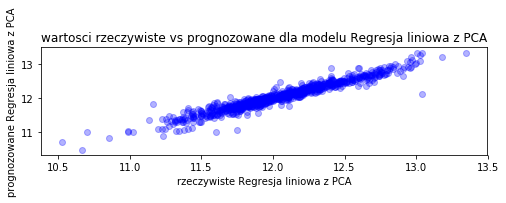

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversi

Regresja grzbietowa mean_absolute_error: 0.07608988965131325
Regresja grzbietowa root_mean_square_error: 0.12348689401631004
Regresja grzbietowa median_absolute_error: 0.05353570982092393
Regresja grzbietowa r2_score: 0.9129716785322621


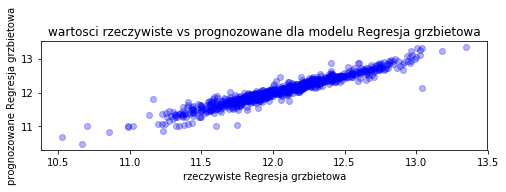

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversi

Regresja grzbietowa z PCA mean_absolute_error: 0.12592712734751713
Regresja grzbietowa z PCA root_mean_square_error: 0.16942316436552954
Regresja grzbietowa z PCA median_absolute_error: 0.09983178051711228
Regresja grzbietowa z PCA r2_score: 0.7961815685634008


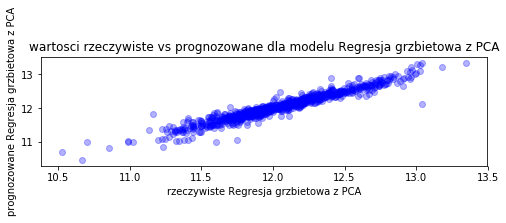

Gradient Boosting regressor mean_absolute_error: 0.4554499170058513
Gradient Boosting regressor root_mean_square_error: 0.5763117352587886
Gradient Boosting regressor median_absolute_error: 0.05495425750203076
Gradient Boosting regressor r2_score: 0.9218045031427868


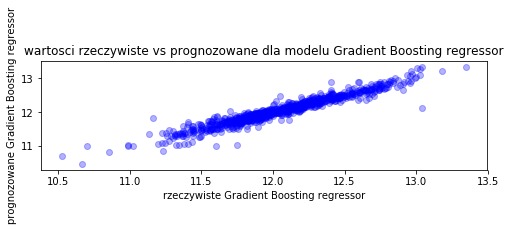

In [195]:
# ostatni etap procesu modelowania (szukania najlepszego modelu regresji)
# testuje 6 modeli i wybieram ich najlepszy zestaw metaparametrow a nastepnie 
# oceniam ich jakosc (models performance)

X = X0
# y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# y_test2 = copy.deepcopy(y_test) #zeby pozniej stworzyc residuals!

names = np.array(["Regresja liniowa z PCA",
                  "Regresja grzbietowa", "Regresja grzbietowa z PCA", 
                  "Drzewo regresyjne","Las regresyjny", "Gradient Boosting regressor"]
                  )

pipes = [[("scaler", StandardScaler()), ("reduce_dim", PCA()), ("model", LinearRegression())],
         [("scaler", StandardScaler()), ("model", Ridge())],
         [("scaler", StandardScaler()), ("reduce_dim", PCA()), ("model", Ridge())],
         [("model", DecisionTreeRegressor())],
         [("model", RandomForestRegressor())],
         [("model", GradientBoostingRegressor())]
        ]
#            "Regresja liniowa z PCA"
param_grids = [{'reduce_dim__n_components': [1,2,3,4]},
#            "Regresja grzbietowa" 
               {'model__alpha': [0.1, 0.5]},
#            "Regresja grzbietowa z PCA"
               {'reduce_dim__n_components': [1,2,3,4], 'model__alpha': [0.1, 0.5]},
#            "Drzewo regresyjne"
               {"model__criterion": ["mse", "mae"], 
                "model__min_samples_split": range(2, 4), 
                "model__max_depth": [None, 2,3,4,5], 
                "model__min_samples_leaf": [1,2,3,4],
                "model__splitter":         ["best", "random"]},
             
#           "Las regresyjny"
               {"model__n_estimators": [50,100, 150], 
                "model__criterion": ["mse", "mae"],
                "model__max_depth": [2,3,4],  
                "model__min_samples_leaf":[1,2,3,4]},
#           "Gradient Boosting regressor"
               {'model__n_estimators': [50, 100, 150]}
              ]

uses = np.array([True,True,True, False, False, True])

if len(names) != len(pipes) or len(pipes) != len(param_grids) or len(param_grids) != len(uses):
    print(f"len(names): {len(names)}")
    print(f"len(pipes): {len(pipes)}")
    print(f"len(param_grids): {len(param_grids)}")
    print(f"len(uses): {len(uses)}")
    raise ValueError("Listy nie mają tej samej długości!")

best_models = []
best_models_names = []
best_models_params = []

for use, name, pipe, params in zip(uses, names, pipes, param_grids):
    if not use:
        continue
    print(f"pipe: {name}")
    pipeline = Pipeline(pipe)
    gs = GridSearchCV(estimator=pipeline, param_grid=params, n_jobs=3)
    gs.fit(X_train, y_train)
    for name, mean, std, param, fit_time, score_time in zip(name, 
                                gs.cv_results_["mean_test_score"],
                                gs.cv_results_["std_test_score"],
                                gs.cv_results_["params"],
                                gs.cv_results_["mean_fit_time"],
                                gs.cv_results_["mean_score_time"]):
        print(f"{param}:\n mean: {np.round(mean, 4)}, std: {np.round(std,4)},\n fit_time: {np.round(fit_time, 4)}, score_time: {np.round(score_time,4)}\n")
    best_models_names.append(name)
    best_models_params.append(gs.best_params_)
    best_models.append(gs.best_estimator_)

best_models = np.array(best_models)

Model_names = best_models_names
Model_params = best_models_params
MAE_values  = []
RMSE_values = []
MEAE_values = []
r2_values   = [] 

   
print("\n\nModel performance:")    
for name, best_model in zip(names[uses], best_models):    
    print(f"{name} mean_absolute_error: {mean_absolute_error(best_model.predict(X_test), y_test)}")
    print(f"{name} root_mean_square_error: {root_mean_square_error(best_model.predict(X_test), y_test)}")
    print(f"{name} median_absolute_error: {median_absolute_error(best_model.predict(X_test), y_test)}")
    print(f"{name} r2_score: {r2_score(best_model.predict(X_test), y_test)}")
    
#     y_pred = best_model.predict(X_test)
    
#     residuals = pd.DataFrame(data=np.abs(best_model.predict(X_test)-y_test))
    
#     print(y_pred.shape)
#     print(y_true.shape)
    
    MAE_values.append(mean_absolute_error(best_model.predict(X_test), y_test))
    RMSE_values.append(root_mean_square_error(best_model.predict(X_test), y_test))
    MEAE_values.append(median_absolute_error(best_model.predict(X_test), y_test))
    r2_values.append(r2_score(best_model.predict(X_test), y_test))
    
#     y_pred = best_model.predict(X_test)
    fig, axes = plt.subplots(1,1, figsize=(8,2))
    plt.scatter(y_pred, y_test, color='b', alpha=0.3)
    plt.title('wartosci rzeczywiste vs prognozowane dla modelu %s' % (name))
    plt.xlabel('rzeczywiste %s' % (name))
    plt.ylabel('prognozowane %s' % (name))
    plt.show()
    
#     y_test2
#     fig, axes = plt.subplots(1,1, figsize=(8,5))
#     plt.hist(residuals, color='b', bins=40)
#     plt.title('Rozklad bledow modelu %s' % (name))
#     plt.xlabel('Poziom bledow')
#     plt.ylabel('Ilosc')
#     plt.show()
    

          
    

In [ ]:
y_pred = best_model.predict(X_test)
fig, axes = plt.subplots(1,1, figsize=(8,2))
plt.scatter(y_pred, y_test, color='b', alpha=0.3)
#     plt.title('wykres %s' % (var))
plt.show()

In [ ]:
# # plt.barh(range(n_features), model.feature_importances_, align='center')
# y_pred = best_model.predict(X_test)
# fig, axes = plt.subplots(1,1, figsize=(8,2))
# # plt.barh(range(n_features), model.feature_importances_, align='center')
# plt.scatter(y_pred, y_test, color='b', alpha=0.3)
# #     plt.title('wykres %s' % (var))
# plt.show()


In [197]:
d = {     'Model_params':           best_models_params,
          'mean_absolute_error':    MAE_values, 
          'root_mean_square_error': RMSE_values, 
          'median_absolute_error':  MEAE_values,
          'r2_score' :              r2_values
    }
    
df = pd.DataFrame(data=d, index=["Regresja liniowa z PCA",
                  "Regresja grzbietowa", "Regresja grzbietowa z PCA", 
#                   "Drzewo regresyjne","Las regresyjny", 
                                "Gradient Boosting regressor"
                                ]
                        
                 )
# df.insert(loc=0, column='Method', value=['name'])

df
# df.Model_params

,Model_params,mean_absolute_error,root_mean_square_error,median_absolute_error,r2_score
Regresja liniowa z PCA,{'reduce_dim__n_components': 4},0.125909,0.169512,0.099792,0.795811
Regresja grzbietowa,{'model__alpha': 0.5},0.076090,0.123487,0.053536,0.912972
Regresja grzbietowa z PCA,"{'model__alpha': 0.1, 'reduce_dim__n_component...",0.125927,0.169423,0.099832,0.796182
Gradient Boosting regressor,{'model__n_estimators': 150},0.455450,0.576312,0.054954,0.921805


In [ ]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

In [ ]:
optEstimation = gs.best_estimator_
optEstimation.fit(X1,y)

In [ ]:
# ax1 = plt.subplot(11)
# ax1.hist(np.abs(best_model.predict(X_test)-y_test),50,facecolor='blue',alpha=0.75)
# plt.xlabel('Error level')
# plt.ylabel('Number of cases')
# plt.title('Error distribution')
# ax2 = plt.subplot(132)
# ax2.hist(np.abs(trainingOverestimatedScores-trainingOverestimatedTarget),50,facecolor='blue',alpha=0.75)
# plt.xlabel('Error level')
# plt.ylabel('Number of cases')
# plt.title('Error distribution for overestimated cases')
# ax3 = plt.subplot(133)
# ax3.hist(np.abs(trainingUnderestimatedScores-trainingUnderestimatedTarget),50,facecolor='blue',alpha=0.75)
# plt.xlabel('Error level')
# plt.ylabel('Number of cases')
# plt.title('Error distribution for underestimated cases')

# plt.gcf().set_size_inches(20,3)
# plt.show()

In [ ]:
# # definiuje kryterium informacyjne BIC do dalszej analizy regresji krokowej

# def BIC(msa, p, n):
#     return n*np.log(mse)+p*np.log(n)

In [ ]:
# n, m = X1.shape
# best_idx = []
# best_free = set(range(m))
# best_fit = np.inf
# res = []
# for i in range(0, m):
#     cur_idx = -1
#     cur_fit = np.inf
#     for e in best_free:
#         r = sklearn.linear_model.LinearRegression()
#         test_idx = best_idx+[e]
#         r.fit(X1.iloc[:, test_idx], y)
#         test_fit = sklearn.metrics.mean_squared_error(y, r.predict(X1.iloc[:, test_idx]))
#         if test_fit< cur_fit:
#             cur_idx, cur_fit = e, test_fit
#             if cur_fit > best_fit: break
#             best_idx, best_fit = best_idx + [cur_idx], cur_fit
#             best_free.discard(cur_idx)
#             res.append((cur_idx,cur_fit))

In [ ]:
# proba zastosowania regresji


# def forward_selection(X, y):
#     n, m = X.shape
#     best_idx = []
#     best_free = set(range(m))
#     best_fit = np.inf
#     res = []
#     for i in range(0, m):
#         cur_idx = -1
#         cur_fit = np.inf
#         for e in best_free:
#             r = sklearn.linear_model.LinearRegression()
#             test_idx = best_idx+[e]
#             r.fit(X.iloc[:, test_idx], y)
#             test_fit = sklearn.metrics.mean_squared_error(y, r.predict(X.iloc[:, test_idx]))
#             if test_fit< cur_fit:
#                 cur_idx, cur_fit = e, test_fit
#                 if cur_fit > best_fit: break
#                 best_idx, best_fit = best_idx + [cur_idx], cur_fit
#                 best_free.discard(cur_idx)
#                 res.append((cur_idx,cur_fit))
#                 return res    
                     

In [ ]:
# c_out = []
# for c in df04.columns:
#     if c[:2] == "Bs":
#         c_out.append(c)
# c_out        
           
# temp_col = df04.columns.to_frame()
# temp_col.index

In [ ]:
# c_out = []
# for c in df04.columns:
#     if c[:4] == "Year" or c[:6] == "Garage" or c[-4:] == "Sold":
#         c_out.append(c)
# c_out        